In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
def extract_floats(lines):
    result = []
    found_cones = False
    for line in lines:
        if found_cones:
            floats = [round(float(x), 5) for x in line.split(",")[:2]]
            result.append(floats)
        elif "x:" in line:
            found_cones = True
    return result

def extract_xs(lines):
    x_vals = []
    found_cones = False
    for line in lines:
        if found_cones:
            if 'x:' in line:
                x_vals.append(round(float(line.split(":")[-1].rstrip("\n")),5))
        elif 'cones' in line:
            found_cones = True
    return x_vals

directory = 'trial_3.1/raw_data'
dir2 = 'trial_3.1/label'

dfs = []


for filename in os.listdir(directory):
    if filename.endswith(".txt") and not filename.endswith("3667.txt"):
        print(filename)
        filepath = os.path.join(directory, filename)
        filepath2 = os.path.join(dir2, 'labels_'+filename)
        with open(filepath, 'r') as file:
            lines = file.readlines()
            floats = extract_floats(lines)
            df = pd.DataFrame(floats, columns=['x', 'y'])
            df['label'] = 0
        with open(filepath2, 'r') as file:
            lines = file.readlines()
            x_vals = extract_xs(lines)
        for i in range(len(df)):
            if df.iloc[i,0] in x_vals:
                print(i)
                df.iloc[i,2] = 1
        dfs.append(df)

final_df = pd.concat(dfs, ignore_index=True)


1712591254.264277.txt
86
87
88
90
92
93
94
95
98
103
107
110
113
114
120
123
128
129
130
131
184
1712591254.764397.txt
50
51
53
54
55
58
61
62
64
65
71
74
76
77
82
83
84
85
90
91
94
100
105
115
120
125
130
1712591255.26454.txt
62
63
69
72
74
75
82
85
89
94
95
102
108
110
122
126
133
142
153
1712591252.9139888.txt
109
110
111
112
113
114
115
116
117
119
122
126
129
133
136
140
141
144
145
148
150
152
153
154
160
165
166
169
173
250
251
252
253
254
255
256
1712591252.015936.txt
103
104
106
107
110
111
112
113
114
115
116
118
121
123
125
127
130
131
133
134
135
139
144
145
146
150
235
236
1712591253.8140998.txt
69
70
71
72
73
74
75
76
77
79
82
86
90
96
99
101
109
110
116
117
123
126
130
131
135
141
147
223
224
225
226
227
1712591255.414651.txt
64
69
72
80
81
85
87
91
96
97
102
104
110
113
119
124
126
133
142
149
1712591254.1142888.txt
62
63
64
65
66
67
68
69
70
71
72
74
76
77
78
82
84
87
88
89
90
95
96
99
101
106
109
112
117
198
199
200
201
202
203
1712591253.6142788.txt
89
90
91
92
94
95

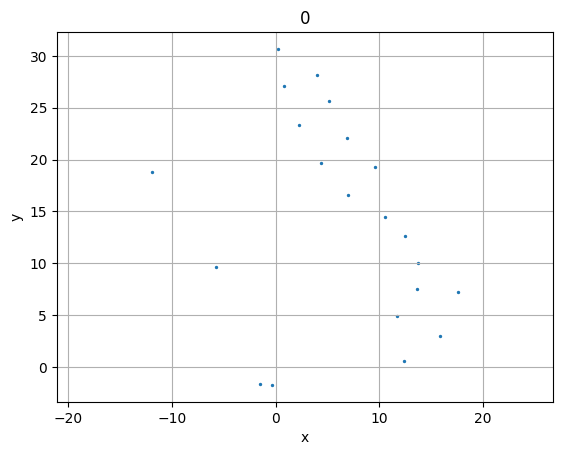

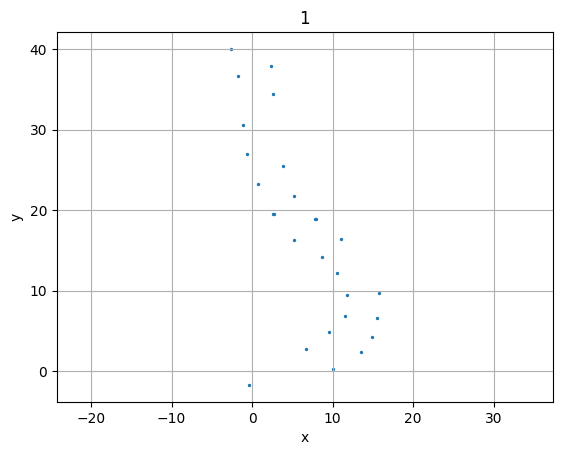

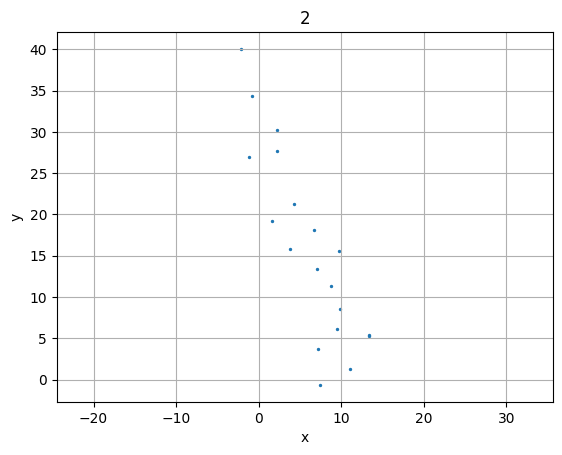

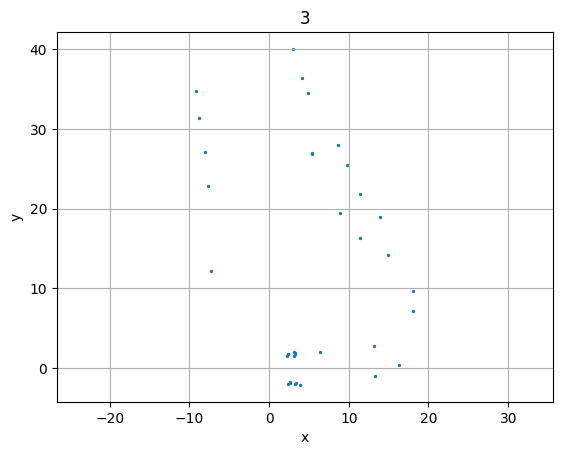

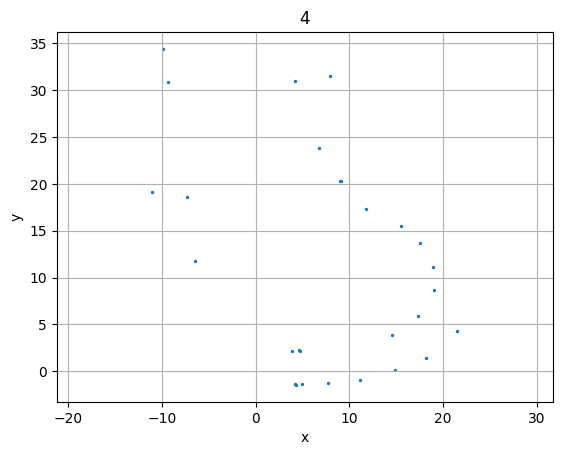

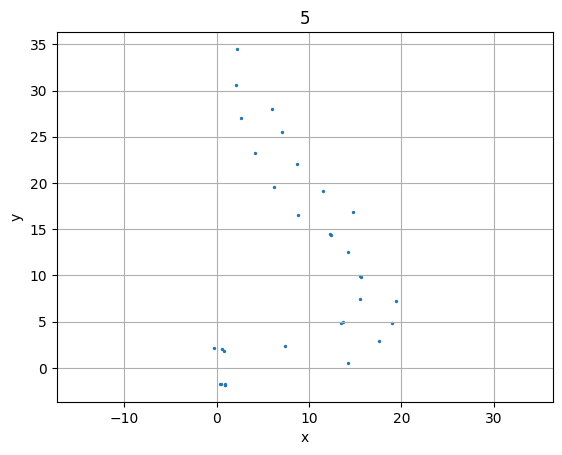

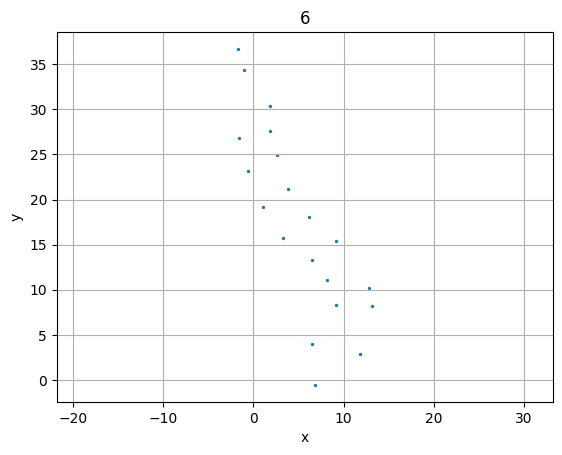

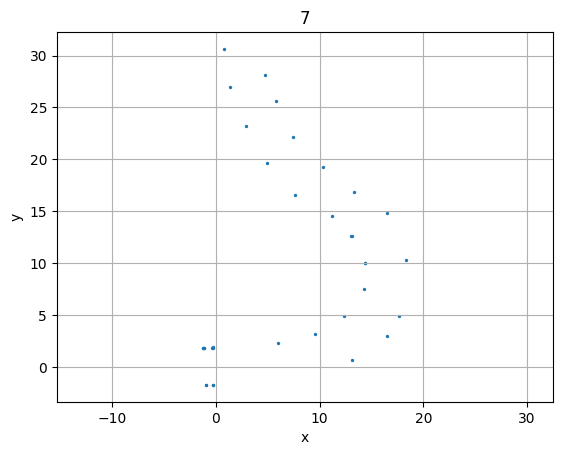

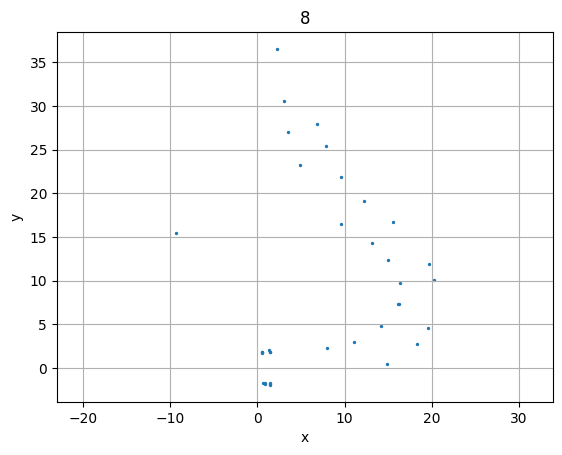

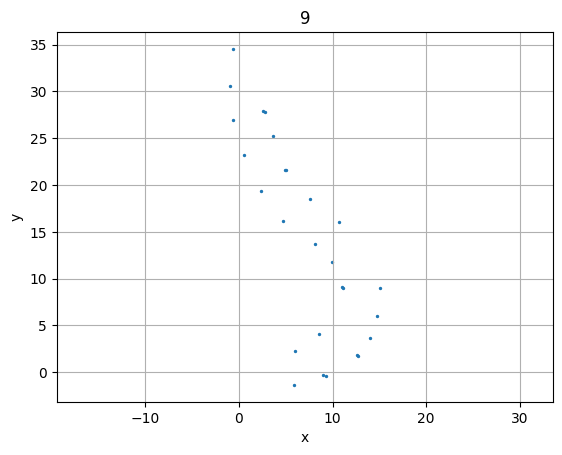

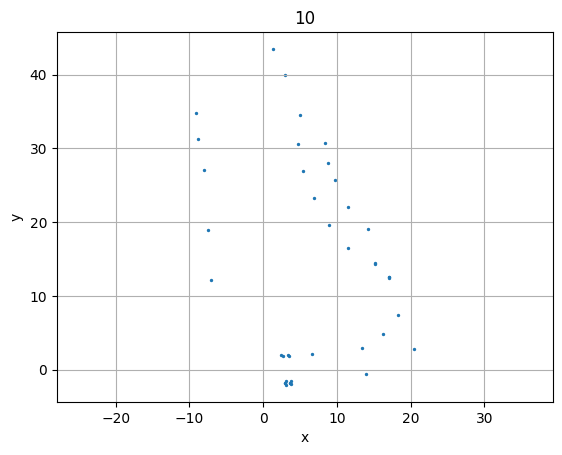

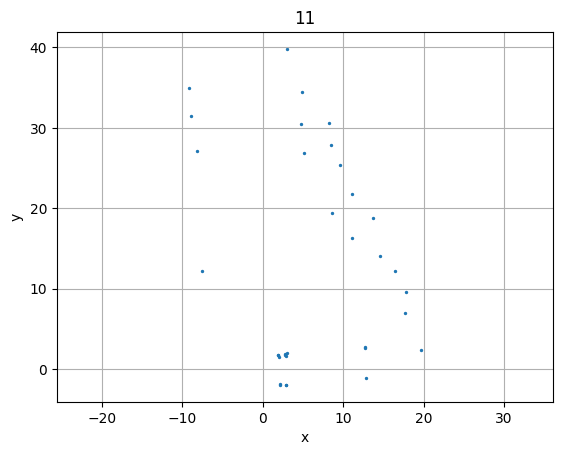

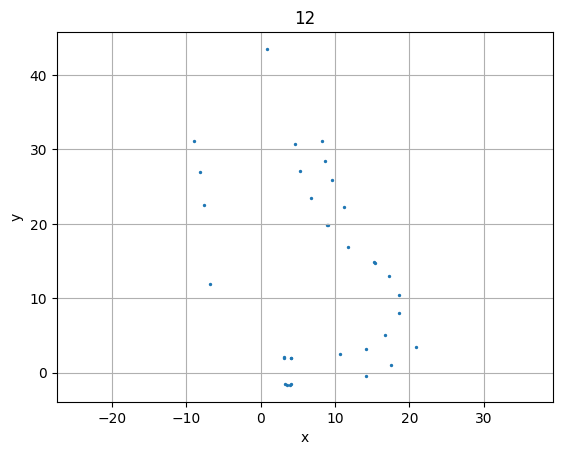

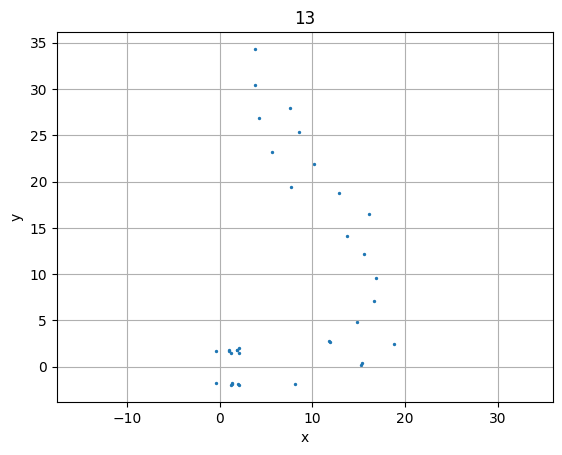

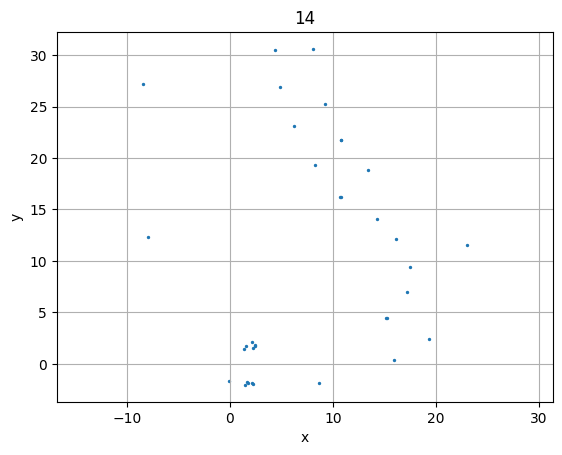

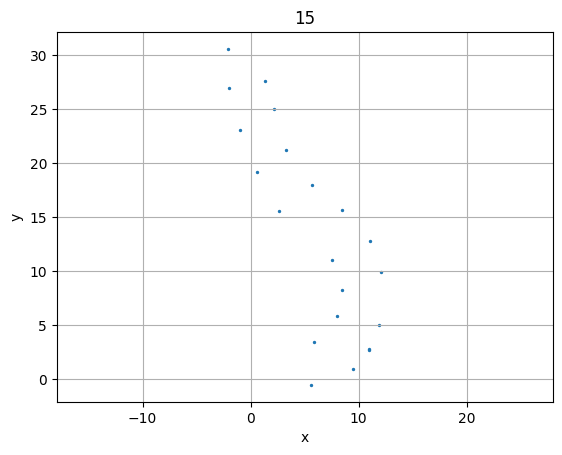

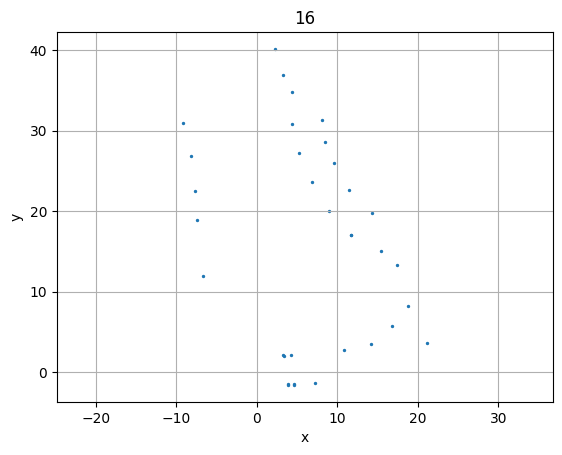

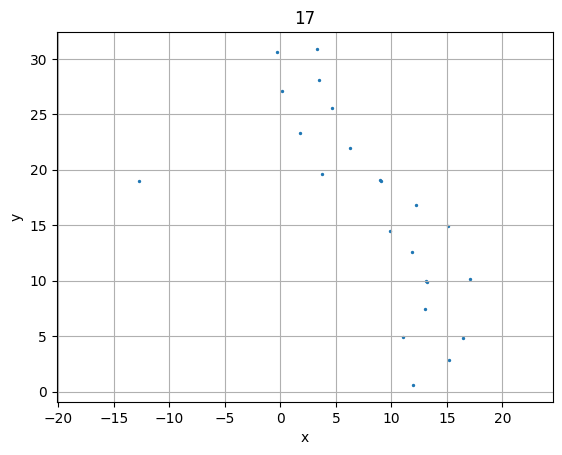

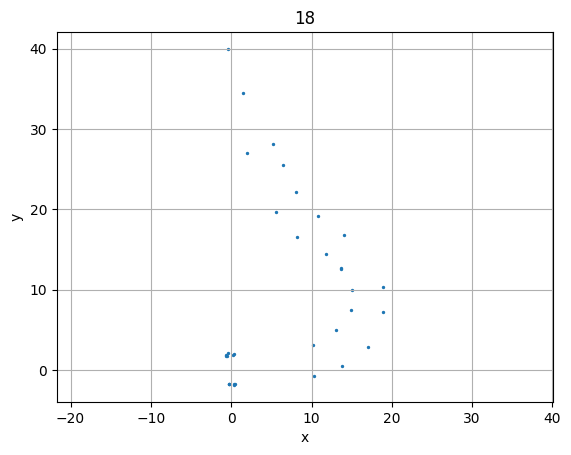

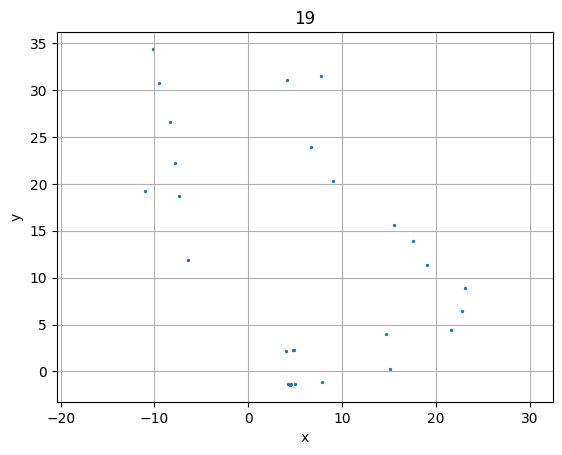

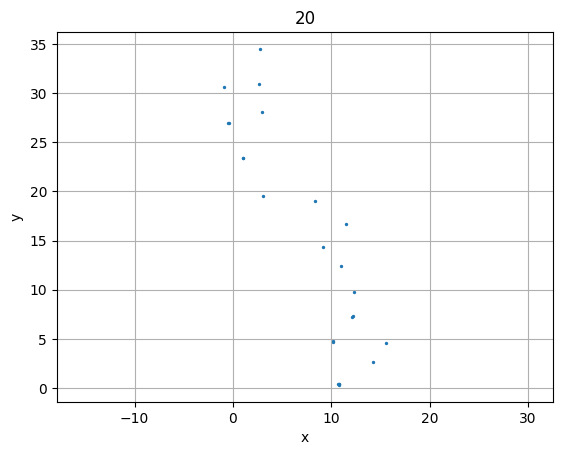

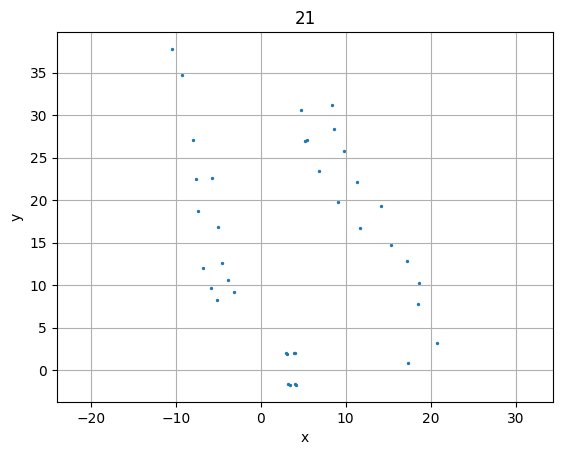

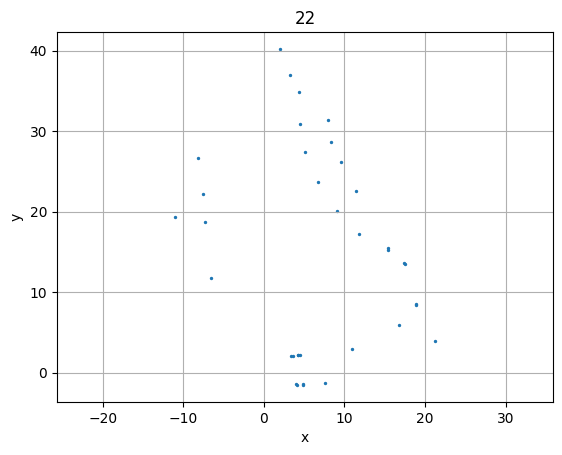

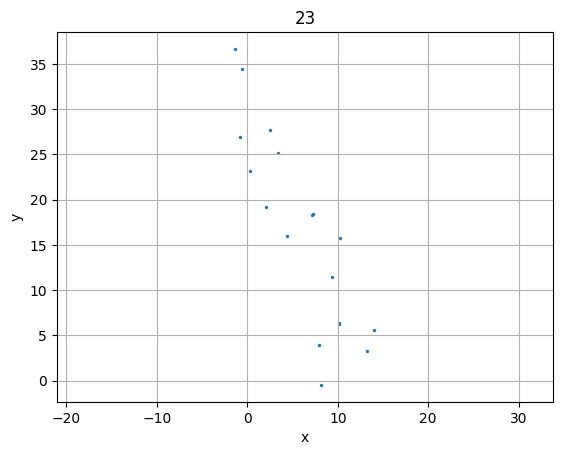

In [3]:

def extract_points(df):
    points = []
    for i in range(len(df)):
        if df.iloc[i,2]==1:
            x, y = df.iloc[i,0], df.iloc[i,1]
            points.append((x,y))
    return points

def plot_points(points, i):
    x_values = [point[0] for point in points]
    y_values = [point[1] for point in points]

    plt.scatter(x_values, y_values, s=2)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(i)
    plt.grid(True)
    plt.axis('equal')  
    plt.show()

for i in range(len(dfs)):
    points = extract_points(dfs[i])
    plot_points(points, i)
    #print(i)
    #print(dfs[i])




In [4]:
#checking the resolution, so making each point an image with point rounded to nearest 10 cm

dfs2 = []
def round_points(df):
    for i in range(len(df)):
        df.iloc[i,0], df.iloc[i,1] = round(df.iloc[i,0], 1), round(df.iloc[i,1], 1)
    return df
for i in range(len(dfs)):
    dfs2.append(round_points(dfs[i]))

print(dfs2[0])

        x     y  label
0     6.7 -25.3      0
1    -6.5 -21.0      0
2    -6.3 -21.1      0
3    -4.8 -20.8      0
4    -3.7 -21.1      0
..    ...   ...    ...
229  20.2  43.2      0
230  17.8  43.9      0
231  18.3  43.7      0
232  19.2  43.5      0
233  15.6  46.9      0

[234 rows x 3 columns]


In [5]:
for i in range(len(dfs2)):
    lowest_x = 0
    highest_x = 0
    lowest_y = 0
    highest_y = 0
    for j in range(len(dfs2[i])):
        if dfs2[i].iloc[j,0] < lowest_x:
            lowest_x = dfs2[i].iloc[j,0]
        if dfs2[i].iloc[j,0] > highest_x:
            highest_x = dfs2[i].iloc[j,0] 
        if dfs2[i].iloc[j,1] < lowest_y:
            lowest_y = dfs2[i].iloc[j,1]
        if dfs2[i].iloc[j,1] > highest_y:
            highest_y = dfs2[i].iloc[j,1]

print(lowest_x, highest_x, lowest_y, highest_y)

-9.5 47.1 -47.2 49.7


(651, 1001)
(651, 1001)


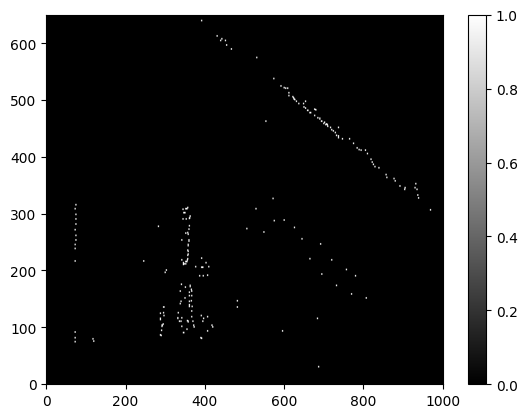

(651, 1001)


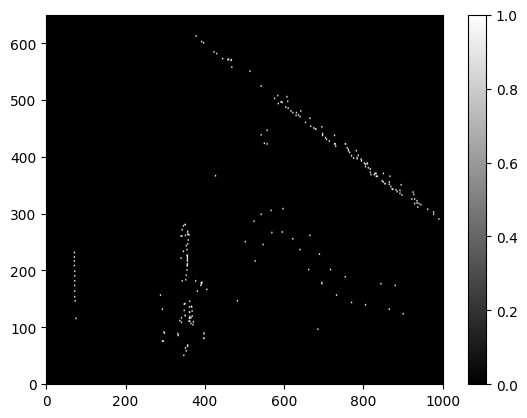

(651, 1001)


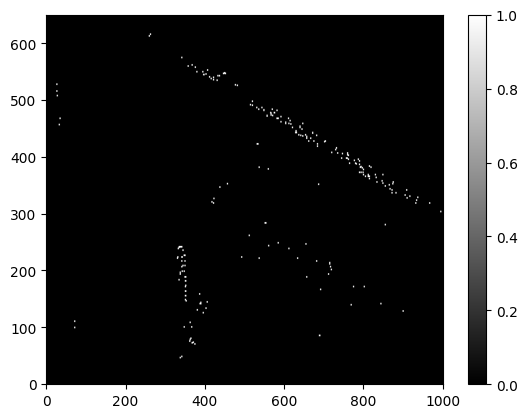

(651, 1001)


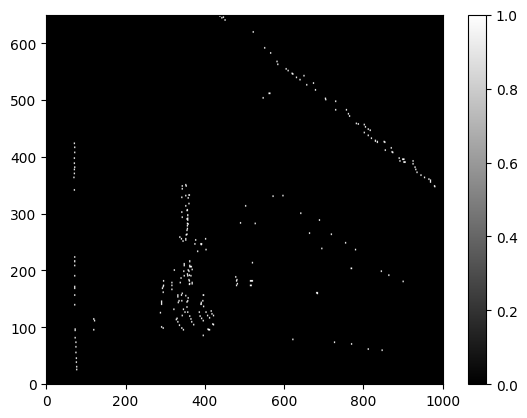

(651, 1001)


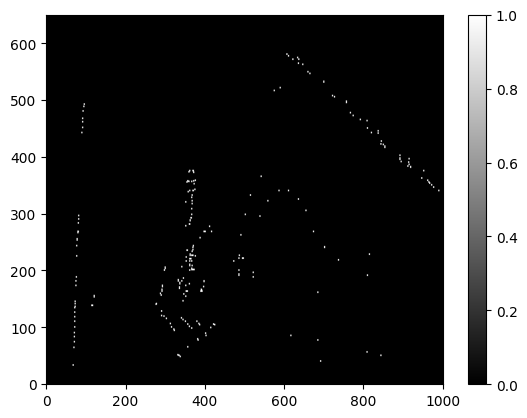

(651, 1001)


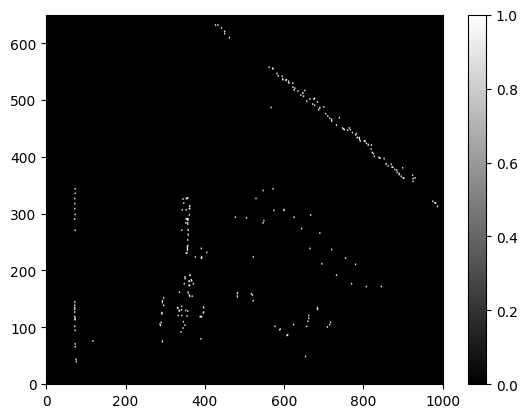

(651, 1001)


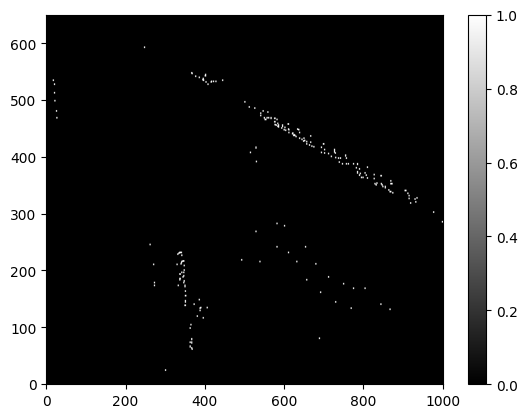

(651, 1001)


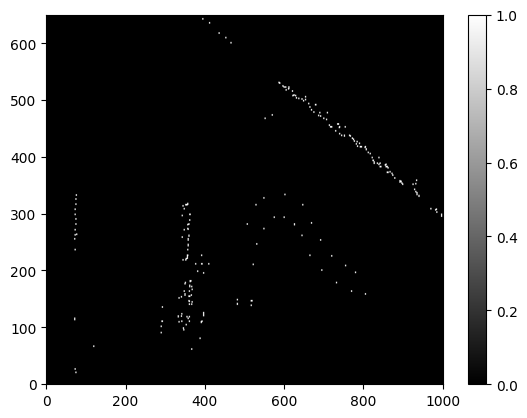

(651, 1001)


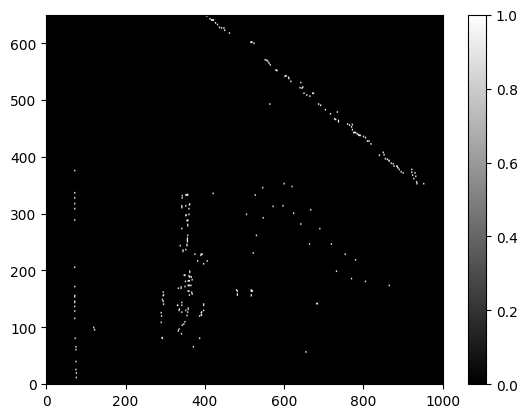

(651, 1001)


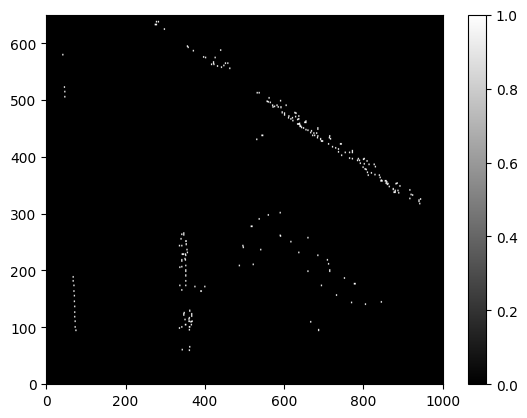

(651, 1001)


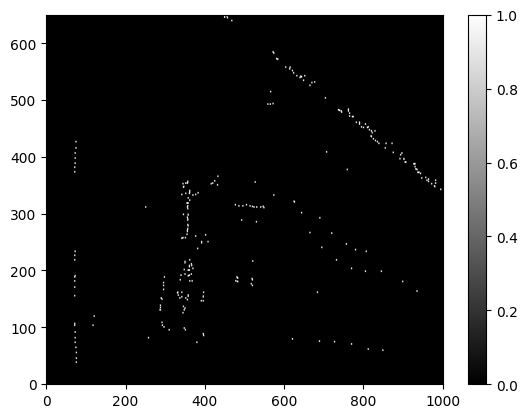

(651, 1001)


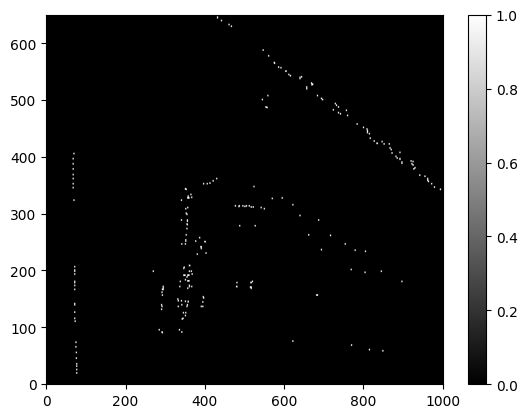

(651, 1001)


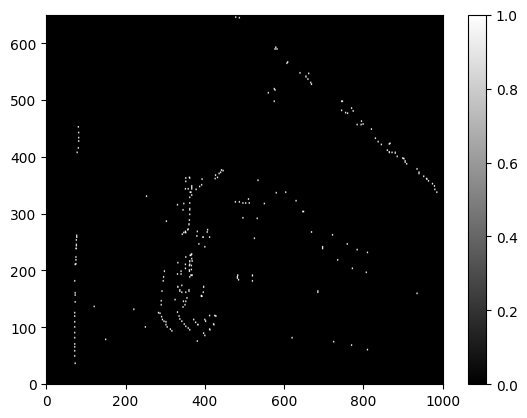

(651, 1001)


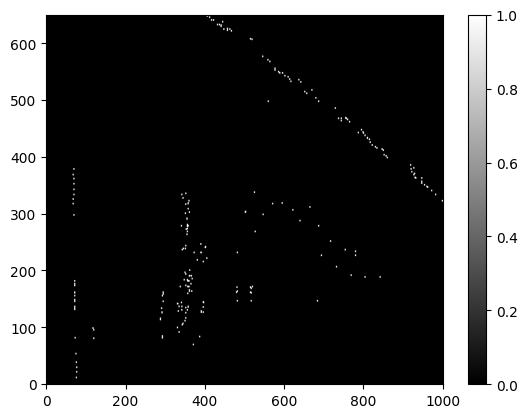

(651, 1001)


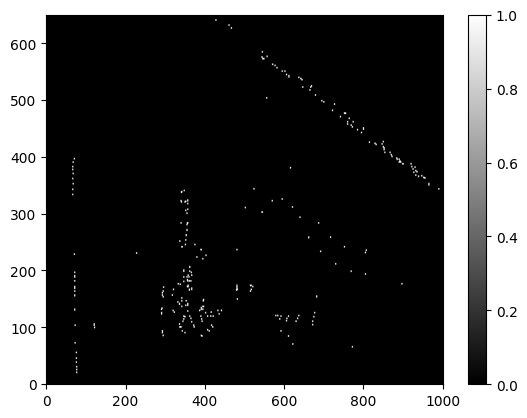

(651, 1001)


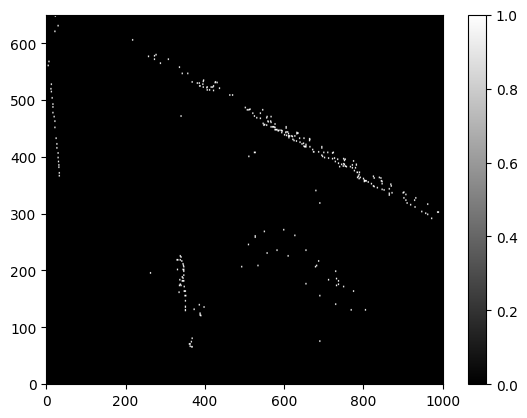

(651, 1001)


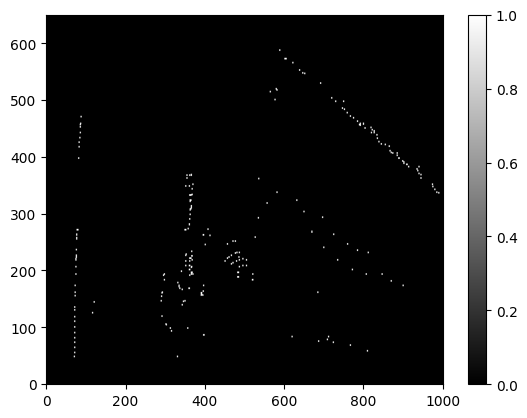

(651, 1001)


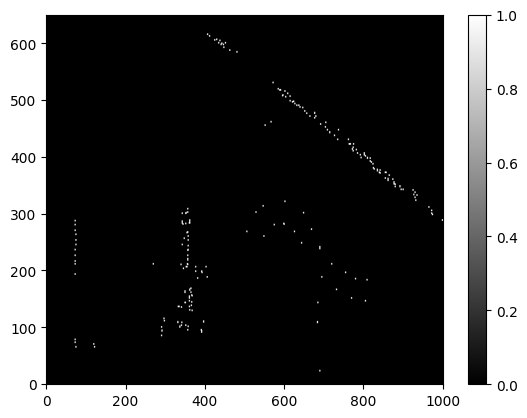

(651, 1001)


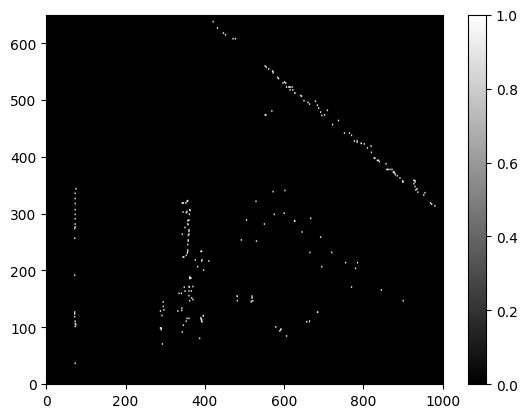

(651, 1001)


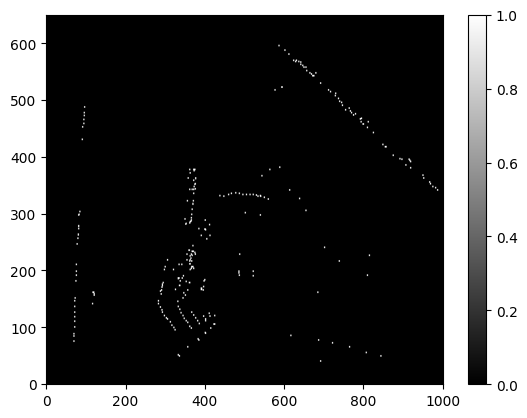

(651, 1001)


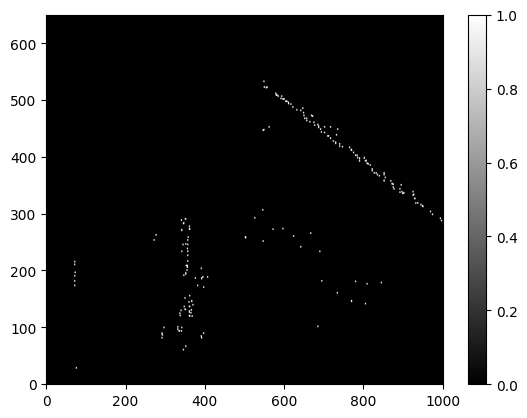

(651, 1001)


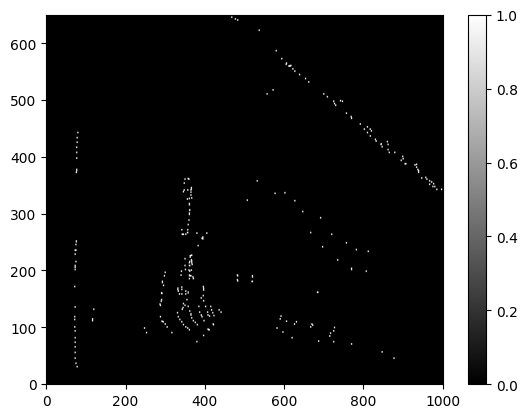

(651, 1001)


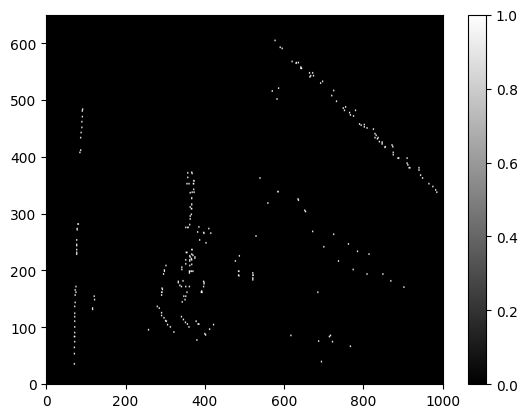

(651, 1001)


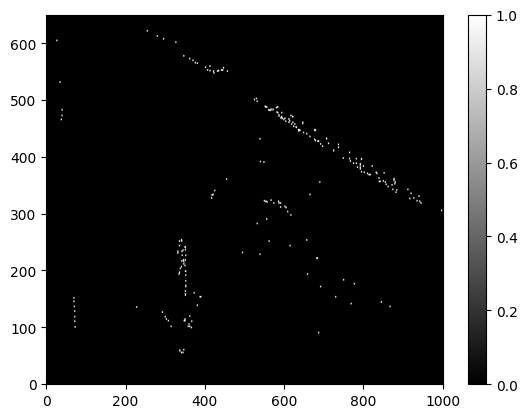

(651, 1001)


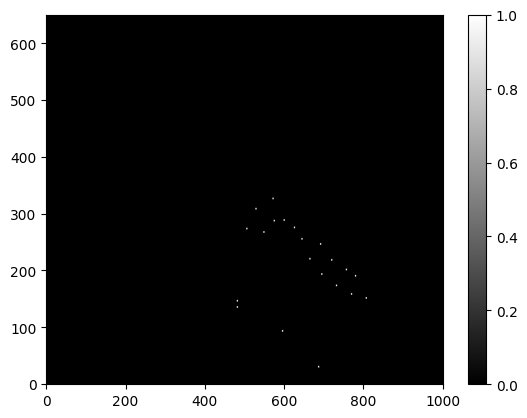

(651, 1001)


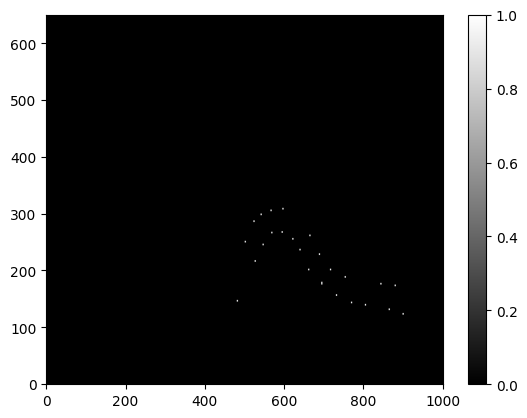

(651, 1001)


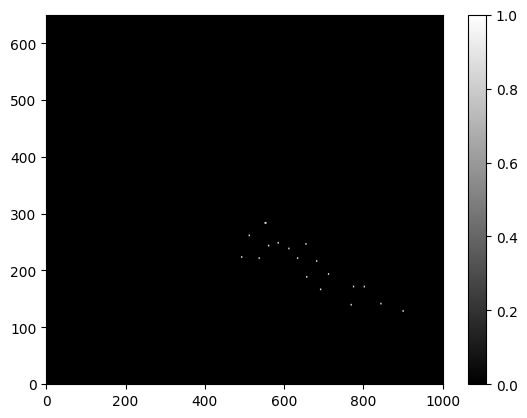

(651, 1001)


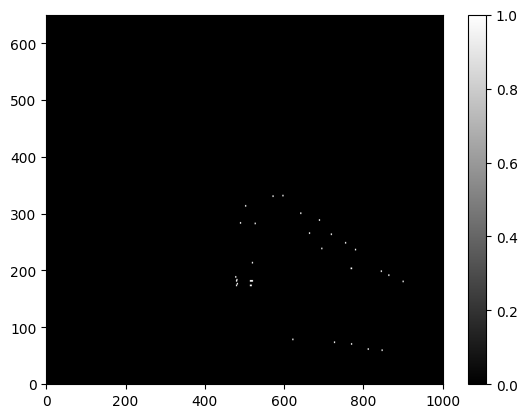

(651, 1001)


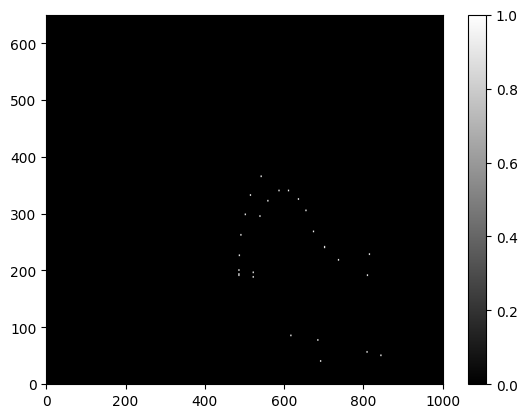

(651, 1001)


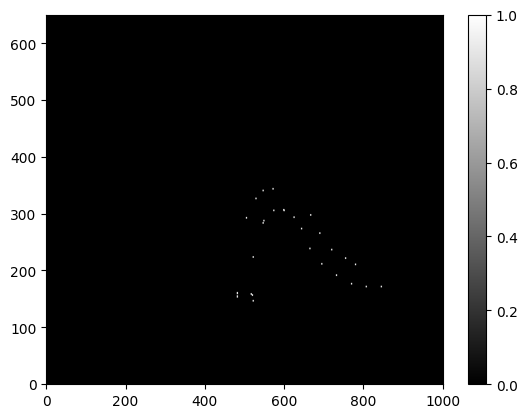

(651, 1001)


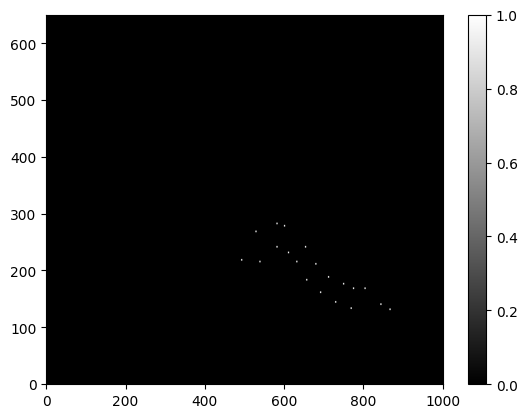

(651, 1001)


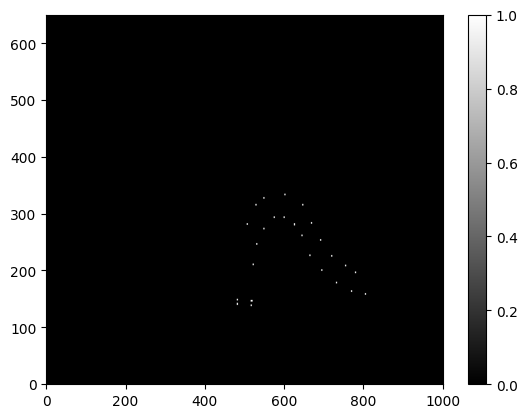

(651, 1001)


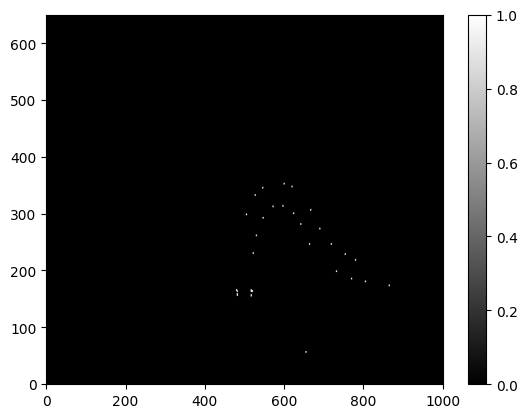

(651, 1001)


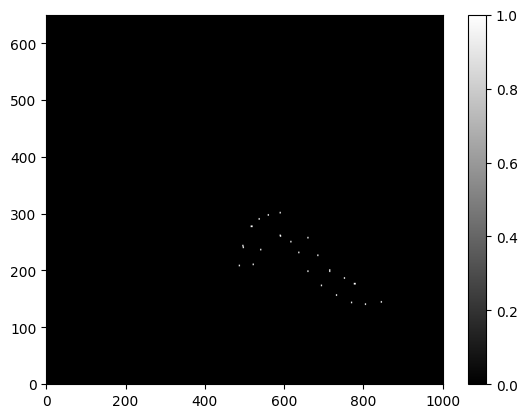

(651, 1001)


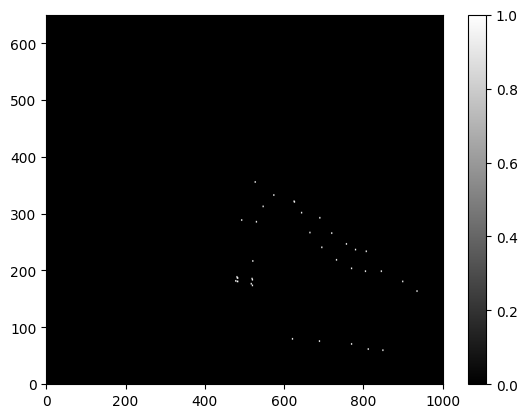

(651, 1001)


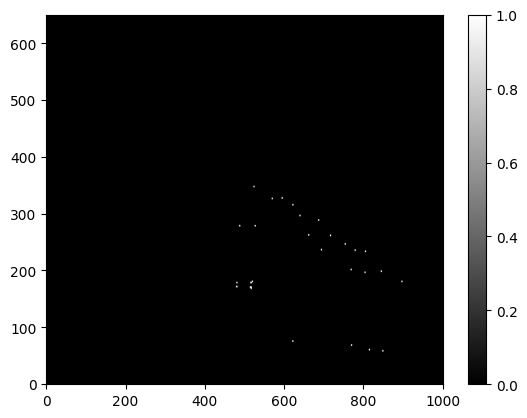

(651, 1001)


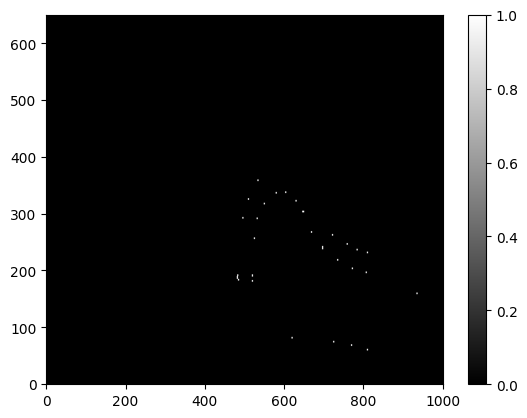

(651, 1001)


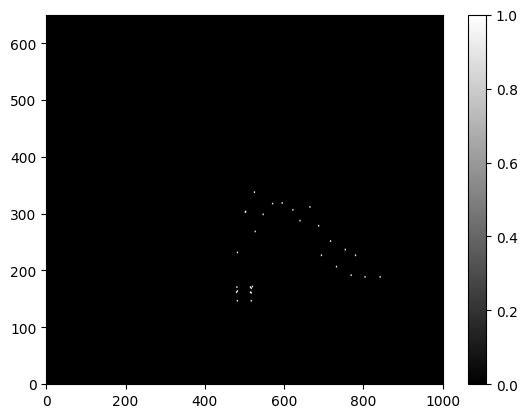

(651, 1001)


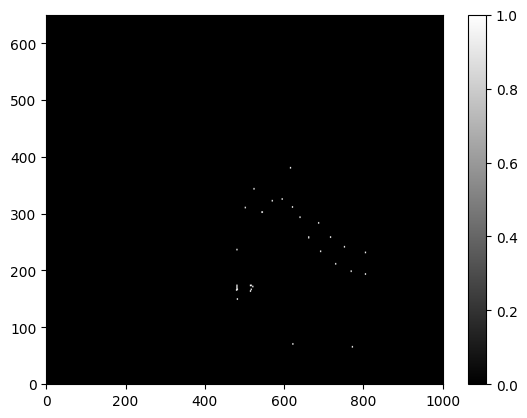

(651, 1001)


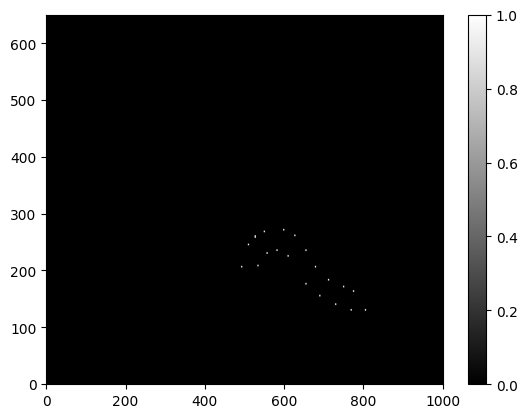

(651, 1001)


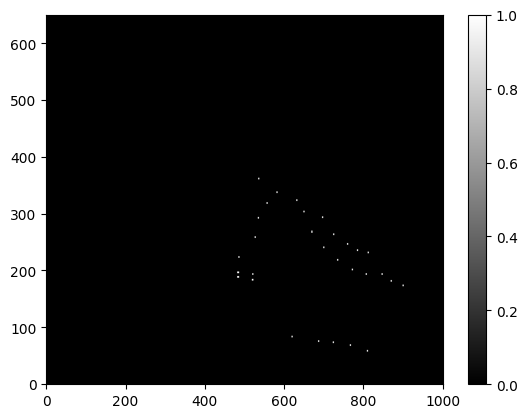

(651, 1001)


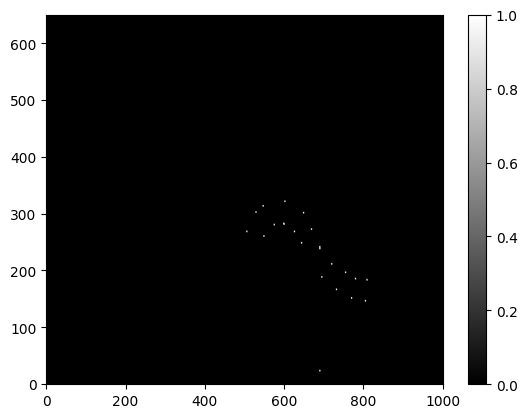

(651, 1001)


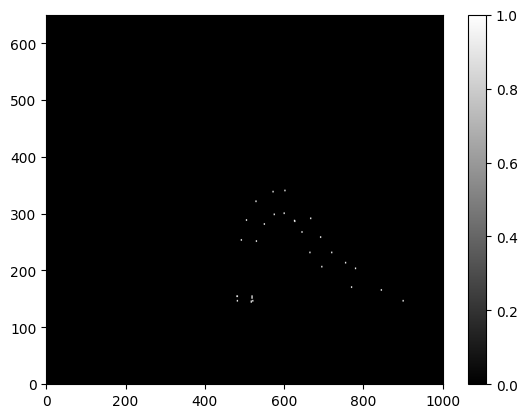

(651, 1001)


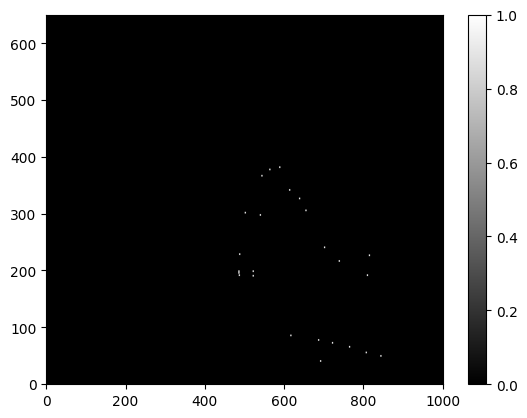

(651, 1001)


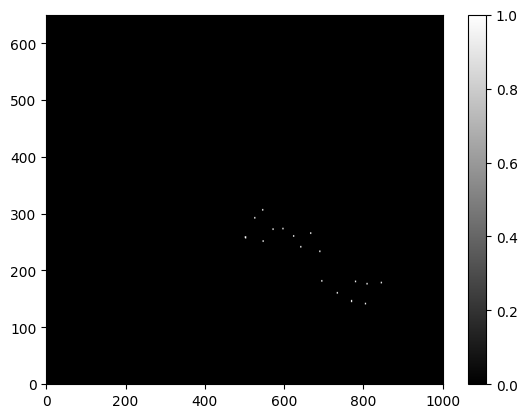

(651, 1001)


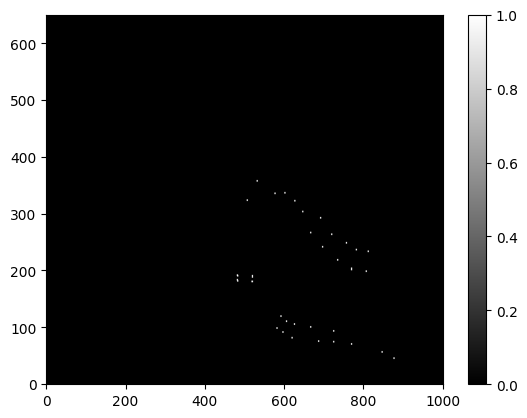

(651, 1001)


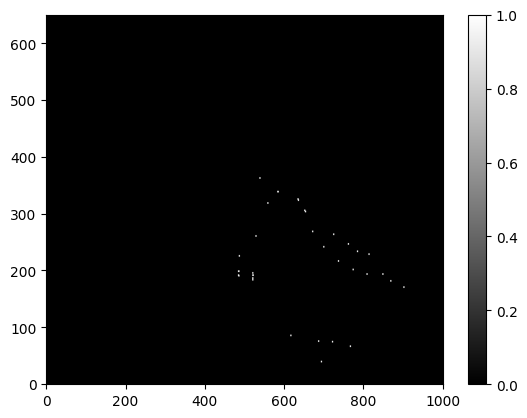

(651, 1001)


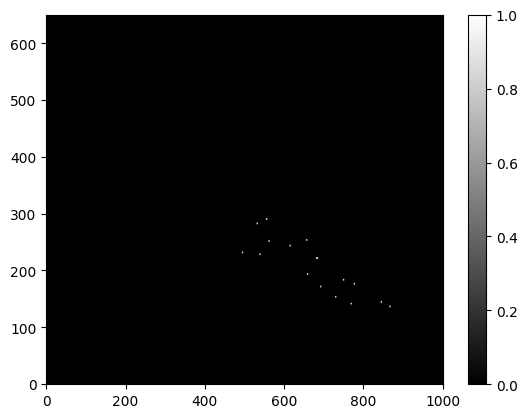

In [6]:
import numpy as np
import pandas as pd

rows = np.arange(-15, 50.1, 0.1)
columns = np.arange(-50, 50.1, 0.1)

X, Y = np.meshgrid(columns, rows)

stand_grid = np.zeros_like(X)
print(stand_grid.shape)


def gen_pairs(df):
    pairs = []
    pairs_labels = []
    for j in range(len(df)):
        pairs.append((df.iloc[j,0], df.iloc[j,1]))
        if df.iloc[j,2]==1:
            pairs_labels.append((df.iloc[j,0], df.iloc[j,1]))
    return pairs, pairs_labels

imags = []
imags_labels = []
for i in range(len(dfs2)):
    copy = stand_grid.copy()
    copy2 = stand_grid.copy()
    pairs, pairs_labels = gen_pairs(dfs2[i])
    for x, y in pairs:
        row_index = int((x - (-15)) / 0.1) 
        column_index = int((y - (-50)) / 0.1)
        
        copy[row_index, column_index] = 1
    for x, y in pairs_labels:
        row_index = int((x - (-15)) / 0.1) 
        column_index = int((y - (-50)) / 0.1)
        
        copy2[row_index, column_index] = 1
    
        #print(x,y)
        #print(row_index, column_index)

    imags.append(copy)
    imags_labels.append(copy2)
    
    # for x, y in pairs:
    #     # Find indices corresponding to x and y in rows and columns arrays
    #     row_index = np.where(rows == x)[0][0]
    #     column_index = np.where(columns == y)[0][0]
    #     # Set value to 1 in the grid
    #     grid[row_index, column_index] = 1

for img in imags:
    print(img.shape)
    rows, cols = img.shape
    expanded_image = img.copy()
    
    for i in range(rows):
        for j in range(cols):
            
            if img[i, j] == 1:
                
                expanded_image[i, j] = 1
                
                for dx in [-1, 0, 1]:
                    for dy in [-1, 0, 1]:
                        
                        if 0 <= i + dx < rows and 0 <= j + dy < cols:
                            
                            expanded_image[i + dx, j + dy] = 1 
    plt.imshow(expanded_image, cmap='binary_r', aspect='auto', origin='lower')
    plt.colorbar()
    plt.show()


for img in imags_labels:
    print(img.shape)
    rows, cols = img.shape
    expanded_image = img.copy()

    for i in range(rows):
        for j in range(cols):
            
            if img[i, j] == 1:
                
                expanded_image[i, j] = 1
                
                for dx in [-1, 0, 1]:
                    for dy in [-1, 0, 1]:
                        # Check bounds
                        if 0 <= i + dx < rows and 0 <= j + dy < cols:
                            # Set neighboring cell to 1
                            expanded_image[i + dx, j + dy] = 1 
    plt.imshow(expanded_image, cmap='binary_r', aspect='auto', origin='lower')
    plt.colorbar()
    plt.show()


In [7]:
#looks decent, now slap on a nn on flattened image
import torch
from torch.utils.data import Dataset, DataLoader

data = []
for img in imags:
    data.append(img)  
labels = []
for img_label in imags_labels:
    labels.append(img_label)


print(len(data))
print(labels[-1].shape)
data = np.stack(data)
labels = np.stack(labels)
data = torch.from_numpy(data)
labels =torch.from_numpy(labels)

print(data.size())
print(labels.size())





#splitting the data
from sklearn.model_selection import train_test_split
print('lengtherino', len(data))

train_data, val_data, train_labels, val_labels = train_test_split(
    data, labels, test_size=0.16, random_state=42
)


# transform = transforms.Compose([
#     transforms.ToTensor(),
#     # Add more transformations if needed
# ])





class CustomDataset(Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels

    def __len__(self):
        return len(self.data)
    
    def __getitem__(self,idx):
        image = self.data[idx]
        label = self.labels[idx]

        image = image.unsqueeze(0)

        return image, label
    
batch = 2
train_dataset = CustomDataset(train_data, train_labels)
val_dataset = CustomDataset(val_data, val_labels)

train_loader = DataLoader(train_dataset, batch_size=batch, shuffle=True, drop_last=True)
val_loader = DataLoader(val_dataset, batch_size=batch, shuffle=False, drop_last=False)

print(f"Training dataset size: {len(train_dataset)}")
print(f"Validation dataset size: {len(val_dataset)}")


24
(651, 1001)
torch.Size([24, 651, 1001])
torch.Size([24, 651, 1001])
lengtherino 24
Training dataset size: 20
Validation dataset size: 4


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import torch.nn.functional as F

class DoubleConv(nn.Module):
    """Extended convolution => [BN] => ReLU sequence"""

    def __init__(self, in_channels, out_channels, mid_channels=None):
        super().__init__()
        if not mid_channels:
            mid_channels = out_channels
            
        self.double_conv = nn.Sequential(
            nn.Conv2d(in_channels, mid_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(mid_channels),
            nn.ReLU(inplace=False),
            nn.Conv2d(mid_channels, mid_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(mid_channels),
            nn.ReLU(inplace=False),
            nn.Conv2d(mid_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=False)
        )
        self.skip = nn.Identity() if in_channels == out_channels else nn.Conv2d(in_channels, out_channels, kernel_size=1)

    def forward(self, x):
        identity = self.skip(x)
        out = self.double_conv(x)
        out = out + identity
        return F.relu(out, inplace=False)

class DilatedConvBlock(nn.Module):
    def __init__(self, in_channels, out_channels, dilation_rate):
        super(DilatedConvBlock, self).__init__()
        self.conv = nn.Conv2d(
            in_channels,
            out_channels,
            kernel_size=3,
            padding=dilation_rate,
            dilation=dilation_rate
        )
        self.bn = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        return self.relu(self.bn(self.conv(x)))


class UNet(nn.Module):
    def __init__(self, n_channels, n_classes):
        super(UNet, self).__init__()
        self.n_channels = n_channels
        self.n_classes = n_classes

        self.inc = DoubleConv(n_channels, 64)
        self.down1 = nn.MaxPool2d(2)
        self.conv1 = DoubleConv(64, 128)
        self.down2 = nn.MaxPool2d(2)
        self.conv2 = DoubleConv(256, 256)
        self.conv2_dilated = DilatedConvBlock(128, 256, dilation_rate=2)
        self.down3 = nn.MaxPool2d(2)  
        self.conv3 = DoubleConv(256, 512) 
        self.up1 = nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2, output_padding=1)
        self.conv4 = DoubleConv(512, 256)
        self.up2 = nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2, output_padding=1)
        self.conv5 = DoubleConv(256, 128)
        self.up3 = nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2, output_padding=1)
        self.conv6 = DoubleConv(128, 64)
        self.outc = nn.Conv2d(64, n_classes, kernel_size=1)


    def match_dimensions(self, x_upsampled, x_downsampled):
        
        _, _, H_down, W_down = x_downsampled.size()
        _, _, H_up, W_up = x_upsampled.size()


        if H_up > H_down or W_up > W_down:
            
            x_upsampled = x_upsampled[:, :, :H_down, :W_down]
        elif H_up < H_down or W_up < W_down:
            
            pad_vertical = (H_down - H_up) // 2
            pad_horizontal = (W_down - W_up) // 2
            x_upsampled = F.pad(x_upsampled, [pad_horizontal, pad_horizontal, pad_vertical, pad_vertical])

        return x_upsampled

    def forward(self, x):
        x1 = self.inc(x)
        x2 = self.down1(x1)
        x2 = self.conv1(x2)
        x2_dilated = self.conv2_dilated(x2)
        x3 = self.down2(x2_dilated)
        x3 = self.conv2(x3)
        x4 = self.down3(x3)
        x4 = self.conv3(x4)
        x = self.up1(x4)
        
        x = self.match_dimensions(x, x3)
        x = torch.cat([x, x3], dim=1)
        x = self.conv4(x)
        x = self.up2(x)


        x = self.match_dimensions(x, x2)
        x = torch.cat([x, x2], dim=1)
        x = self.conv5(x)
        x = self.up3(x)
        
        x = self.match_dimensions(x, x1)
        x = torch.cat([x, x1], dim=1)
        x = self.conv6(x)
        logits = self.outc(x)
        return logits
    
# Initialize the U-Net
model = UNet(n_channels=1, n_classes=2)  
#optimizer = optim.Adam(model.parameters(), lr=1e-4)
optimizer = optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-5)
criterion = nn.CrossEntropyLoss()

num_epochs = 20
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

dict = {}

for epoch in range(num_epochs):
    model.train() 
    running_loss = 0.0

    for inputs, targets in train_loader:
        
        inputs, targets = inputs.float().to(device), targets.long().to(device)


        optimizer.zero_grad()


        outputs = model(inputs)


        loss = criterion(outputs, targets)
        
        loss.backward()
        optimizer.step()


        running_loss += loss.item()
        
    train_loss = running_loss/len(train_loader)
    print(f"Epoch {epoch+1}/{num_epochs}, Training Loss: {train_loss}")

    running_val_loss = 0.0
    model.eval()
    with torch.no_grad(): 
        for inputs, targets in val_loader:
            inputs, targets = inputs.float().to(device), targets.long().to(device)
            outputs = model(inputs)
            val_loss = criterion(outputs, targets)
            running_val_loss += val_loss.item()
            
    val_loss = running_val_loss / len(val_loader)
    print(f"Epoch {epoch+1}/{num_epochs}, Validation Loss: {val_loss:.4f}")
    dict[epoch] = (train_loss, val_loss)


: 

In [ ]:
model.eval()
all_outputs = []
all_labels = []
all_inp = []
with torch.no_grad():
    for inputs, labels in val_loader:
        inputs = inputs.float().to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        all_inp.append(inputs)
        all_outputs.append(outputs)
        all_labels.append(labels)


print(all_outputs[0].shape)
print(all_inp[0].shape)
print(all_labels[0].shape)

tens = all_outputs[0][0][1]

min_value = tens.min()
max_value = tens.max()

print("Minimum value:", min_value.item())
print("Maximum value:", max_value.item())

In [ ]:
def display(points, strang):
    x_values = [point[0] for point in points]
    y_values = [point[1] for point in points]

    plt.scatter(x_values, y_values, s=2)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(strang)
    plt.grid(True)
    plt.axis('equal')
    plt.show()

outputs_numpy = np.round([tensor.cpu().numpy() for tensor in all_outputs])
labels_numpy = [tensor.cpu().numpy() for tensor in all_labels]
inputs_numpy = [tensor.cpu().numpy() for tensor in all_inp]


for i in range(len(outputs_numpy)):
  mask = outputs_numpy[i] > 0
  outputs_numpy[i] = mask.astype(int)


for all in range(len(outputs_numpy)):
  for batch in range(len(outputs_numpy[all])):
    points = []
    points2 = []
    points3 = []
    outputs_numpy[all][batch][1][i][j]
    for i in range(651):
      for j in range(1001):
        if outputs_numpy[all][batch][1][i][j]==1:
          points.append((i,j))
        if labels_numpy[all][batch][i][j]==1:
          points2.append((i,j))
        if inputs_numpy[all][batch][0][i][j]==1:
          points3.append((i,j))

    display(points, 'outputs')
    display(points2, 'labels')
    display(points3, 'inp')



In [ ]:
import matplotlib.pyplot as plt

data = dict

keys = list(data.keys())
x = [key for key in keys]
y1 = [data[key][0] for key in keys]
y2 = [data[key][1] for key in keys]

plt.plot(x, y1, marker='o', linestyle='-', label='Training')

plt.plot(x, y2, marker='o', linestyle='-', label='Validation')

plt.xlabel('Dictionary Key')
plt.ylabel('Value')
plt.title('Plotting Dictionary Data')
plt.legend()

plt.show()

In [8]:
import torch
import torch.nn as nn 
import torch.optim as optim

class BasicCNN(nn.Module):
    def __init__(self):
        super(BasicCNN, self).__init__()

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=5, stride=2, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, stride=2, padding=1)
        pool_layer = nn.MaxPool2d(kernel_size=2, stride=2)

        self.fc1 =  nn.Linear()

    def forward(self, x):
        x = self.conv1(x)
        x = pool_layer(x)
        


(651, 1001)

651-4 / 2  +2, 1001-4 / 2 + 2

326-2 /2, 501-2 /2

162, 250 
162-4 / 2 +2, 250-4 /2 +2



rosbag2_2024_04_08-19_53_28_0.db3

SyntaxError: invalid decimal literal (1060676669.py, line 32)

In [32]:
#print(dfs2[0].iloc[110:150,2])
#for i in range(len(dfs2)):
    #print(len(dfs2[i])-310)
from torch.utils.data import random_split

stand = np.zeros((310,2))
print(stand.shape)

data = []
labeled = []
for i in range(len(dfs2)):
    copy = stand.copy()
    copy2 = stand.copy()
    for j in range(len(dfs2[i])):
        copy[j][0] = dfs2[i].iloc[j,0]
        copy[j][1] = dfs2[i].iloc[j,1]
        if dfs2[i].iloc[j,2] == 1:
            copy2[j][0], copy2[j][1] = 1, 1
    data.append(copy)
    labeled.append(copy2)

# for i in range(len(labeled)):
#     print(np.count_nonzero(labeled[i]==1))
#print(data[0])
#print(data)
#print(data[0].flatten())



dats = []
for dat in data:
    dats.append(dat.flatten())
labels = []
for lab in labeled:
    labels.append(lab.flatten())

print(len(data))
print(labels[-1].shape)
dats = np.stack(dats)
labels = np.stack(labels)
dats = torch.from_numpy(dats)
labels =torch.from_numpy(labels)

print(dats.size())
print(labels.size())

#print(dats[0])
#print(labels[0])
# print(dats[0].to(torch.float32))
dats = dats.to(torch.float32)
labels = labels.to(torch.float32)

class CustomDataset(Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels

    def __len__(self):
        return len(self.data)
    
    def __getitem__(self,idx):
        return self.data[idx], self.labels[idx]

batch = 2
dataset = CustomDataset(dats, labels)

#print(len(dataset))
train_size = 18 #int(0.75 * len(dataset))
val_size = 6 #len(dataset) - train_size

train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
dataloader = DataLoader(train_dataset, batch_size=batch, shuffle=True, drop_last=False)


print(val_dataset[5])

(310, 2)
24
(620,)
torch.Size([24, 620])
torch.Size([24, 620])
(tensor([ 29.2000,  13.1000,  28.8000,  14.2000,  28.9000,  13.8000,  28.6000,
         14.8000,  27.8000,  16.2000,  28.2000,  15.7000,  27.7000,  16.3000,
         46.3000, -24.0000,   3.4000, -16.5000,   7.1000, -16.9000,   7.3000,
        -16.8000,   8.8000, -16.6000,   9.1000, -16.4000, -10.2000, -15.7000,
          4.4000, -16.1000,   4.8000, -15.6000,   5.9000, -15.5000,   6.7000,
        -15.8000,   7.4000, -15.8000,   9.2000, -16.0000,  42.4000, -15.7000,
         -4.9000, -15.1000,  -0.4000, -14.6000,   0.5000, -14.8000,   1.4000,
        -14.8000,   2.3000, -14.8000,   3.2000, -14.8000,   3.9000, -14.7000,
          7.7000, -15.0000,  -4.2000, -13.6000,  40.9000, -14.1000,  -7.7000,
        -12.9000,  -5.0000, -13.2000,  41.1000, -13.1000,  -7.9000, -12.5000,
         -2.0000, -11.9000,  39.9000, -12.0000,  40.7000, -12.4000,  -0.9000,
        -11.0000,  -0.7000, -11.0000,   0.8000, -11.3000,  -2.4000, -10.4000,


In [38]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

class SimpleNN(nn.Module):
    def __init__(self, input_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 20480)
        self.fc2 = nn.Linear(20480, 5012)
        self.fc3 = nn.Linear(5012, input_size)
        self.dropout = nn.Dropout(0.3)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = torch.sigmoid(self.fc3(x))
        return x


input = 620

model = SimpleNN(input_size=input)
criterion = nn.BCEWithLogitsLoss() 
#criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

epochs = 10

for epoch in range(epochs):
    running_loss = 0.0

    for inputs, labels in dataloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch [{epoch + 1}/{epochs}], Loss: {running_loss / len(dataloader)}")




Epoch [1/10], Loss: 0.7517578800519308
Epoch [2/10], Loss: 0.6962914996676974
Epoch [3/10], Loss: 0.6942870881822374
Epoch [4/10], Loss: 0.6941773560312059
Epoch [5/10], Loss: 0.6940132247077094
Epoch [6/10], Loss: 0.6939398911264207
Epoch [7/10], Loss: 0.6942662199338278
Epoch [8/10], Loss: 0.6940179997020297
Epoch [9/10], Loss: 0.6941349175241258
Epoch [10/10], Loss: 0.6942556301752726


In [39]:

dataloader_val = DataLoader(val_dataset, batch_size=1, shuffle=True, drop_last=False)
model.eval()
all_outputs = []
all_labels = []
all_inp = []
with torch.no_grad():
    for inputs, labels in dataloader_val:
        print('fkkk')
        outputs = model(inputs)
        all_inp.append(inputs)
        all_outputs.append(outputs)
        all_labels.append(labels)

fkkk
fkkk
fkkk
fkkk
fkkk
fkkk


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0.
  1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1.
  0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0.
  0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.
  1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.
  0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 

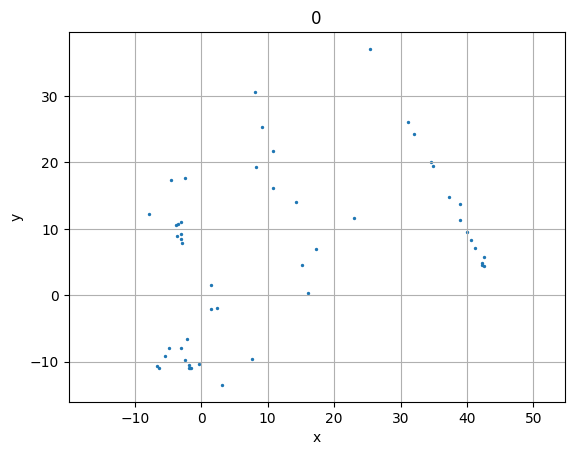

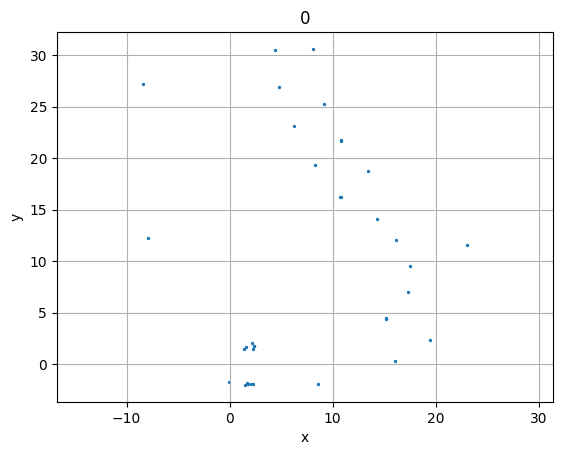

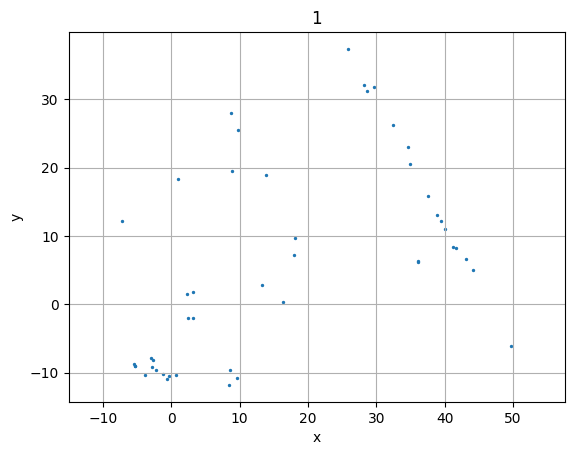

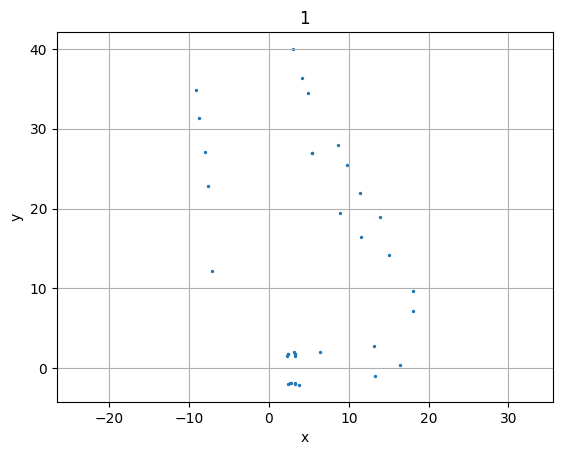

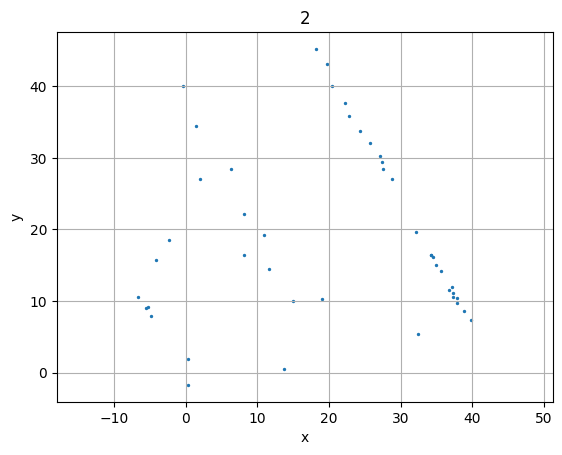

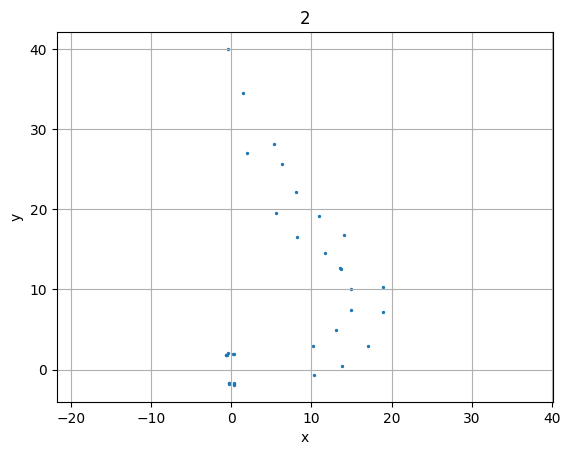

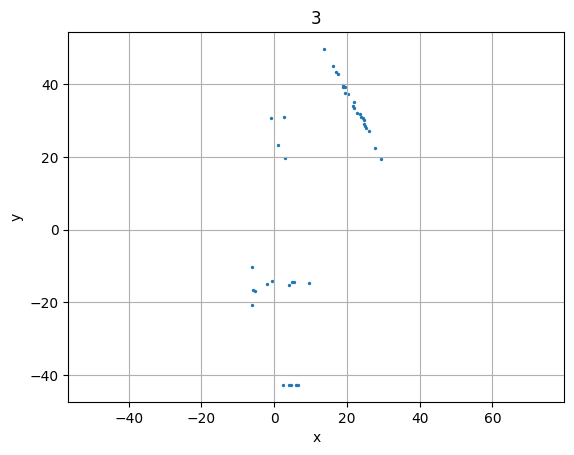

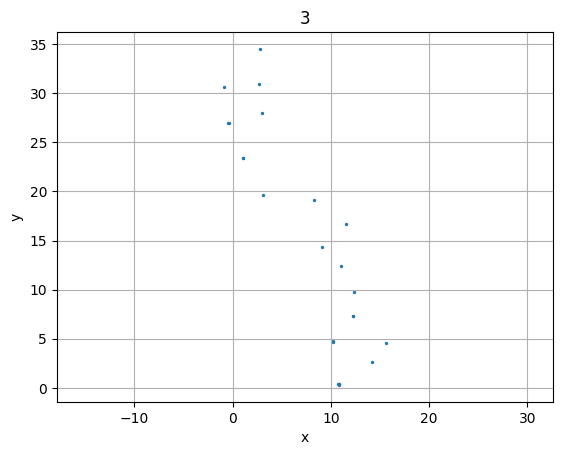

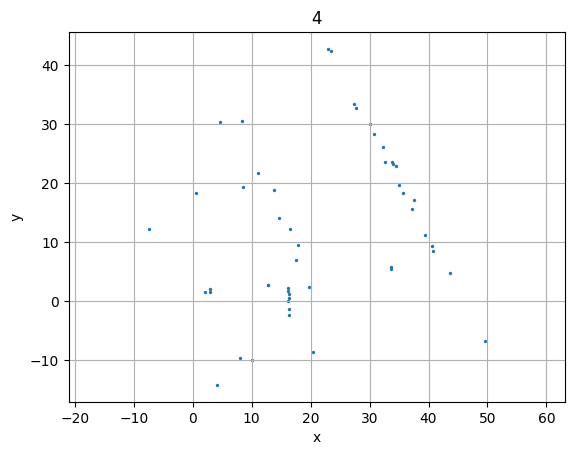

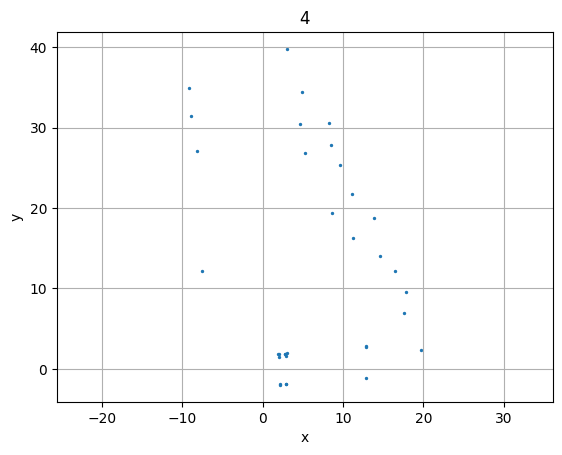

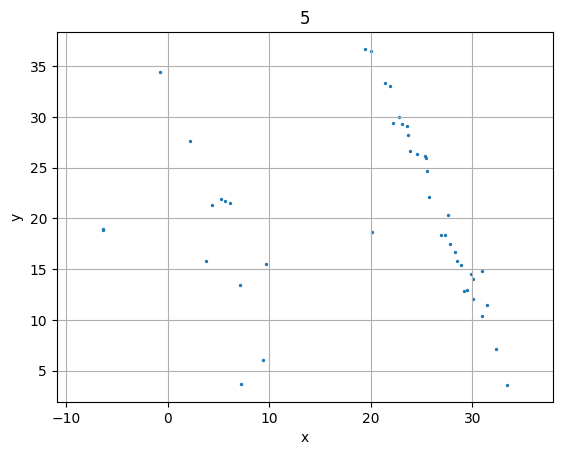

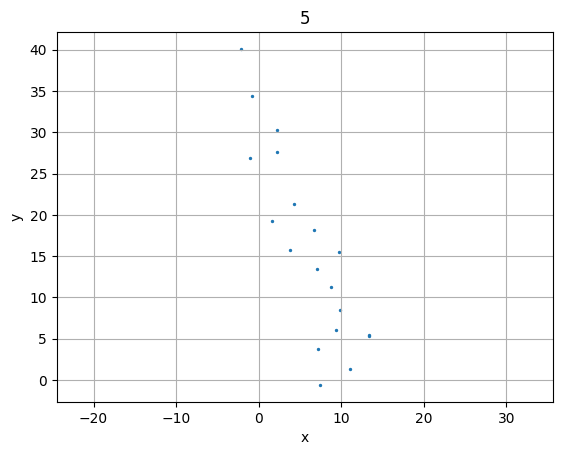

In [37]:
def display(points):
    x_values = [point[0] for point in points]
    y_values = [point[1] for point in points]

    plt.scatter(x_values, y_values, s=2)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(i)
    plt.grid(True)
    plt.axis('equal') 
    plt.show()


outputs_numpy = np.round([tensor.numpy() for tensor in all_outputs])
labels_numpy = [tensor.numpy() for tensor in all_labels]
inputs_numpy = [tensor.numpy() for tensor in all_inp]

print(outputs_numpy[0])
#print(outputs_numpy[0])
for i in range(len(outputs_numpy)):
    points = []
    points2 = []
    for j in range(0,620, 2):
        if outputs_numpy[i][0][j] == 1:
            x = inputs_numpy[i][0][j]
            y = inputs_numpy[i][0][j+1]
            points.append((x,y))
        if labels_numpy[i][0][j] == 1:
            x = inputs_numpy[i][0][j]
            y = inputs_numpy[i][0][j+1]
            points2.append((x,y))

        # x = outputs_numpy[i][0][j]
        # y = outputs_numpy[i][0][j+1]
        # points.append((x,y))
        #print(x,y)
    display(points)
    display(points2)



Results are shit. Not even indicating that the model grasps any sort of geometrical relationships. Tried scaling model massively to 20k and 5k hidden layer size but gradients took off and just predicted nothing as a cone so guess a basic neural net is not a good idea. Going to include some new features and use a SVM as there should be some sort of geometric representation that should be divisible into sections.

In [12]:


from scipy.spatial.distance import cdist
#print(dfs2[0].head()

dfs2_copy = dfs2.copy()

def find_dist(df):
    distances_df = pd.DataFrame()
    for i, row in df.iterrows():
        #print(row)
        #print('\n\n')
        distances = cdist(df[['x', 'y']], np.array(row[['x', 'y']]).reshape(1, -1))
        #print(distances[0])
        #print(len(distances))
        closest_indices = np.argsort(distances.flatten())[:9]
        closest_distances = distances.flatten()[closest_indices]
        #print(len(closest_distances))
        for j in range(9):
            distances_df.loc[i, f'dist{j+1}'] = closest_distances[j]
    return distances_df

for i in range(len(dfs2_copy)):
    dist = find_dist(dfs2_copy[i])
    dfs2_copy[i] = pd.concat([dfs2_copy[i], dist], axis=1)
    label_column = dfs2_copy[i].pop('label')
    dfs2_copy[i]['label'] = label_column

print(dfs2_copy[0].head())

    #for i in 

     x     y  dist1     dist2     dist3     dist4     dist5     dist6  \
0  6.7 -25.3    0.0  5.664804  5.948109  7.049113  9.500526  9.552487   
1 -6.5 -21.0    0.0  0.223607  0.905539  1.711724  1.811077  1.843909   
2 -6.3 -21.1    0.0  0.223607  0.728011  1.529706  1.627882  1.676305   
3 -4.8 -20.8    0.0  0.100000  0.223607  0.424264  0.806226  1.140175   
4 -3.7 -21.1    0.0  0.200000  1.000000  1.044031  1.063015  1.104536   

      dist7     dist8     dist9  label  
0  9.604166  9.908078  9.912618      0  
1  2.061553  2.801785  3.001666      0  
2  1.897367  2.600000  2.800000      0  
3  1.334166  1.529706  1.711724      0  
4  1.118034  1.140175  1.389244      0  


0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64
0.9956709956709957
234


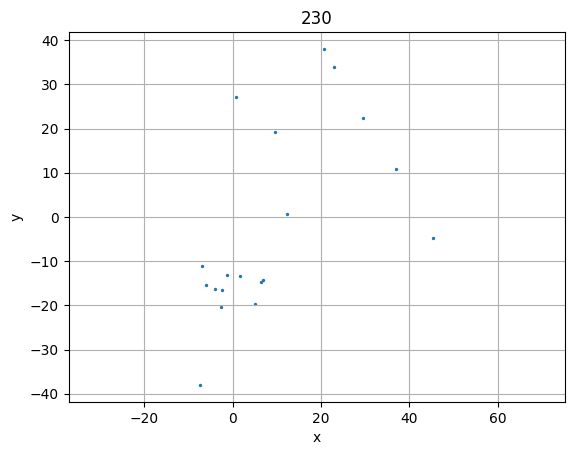

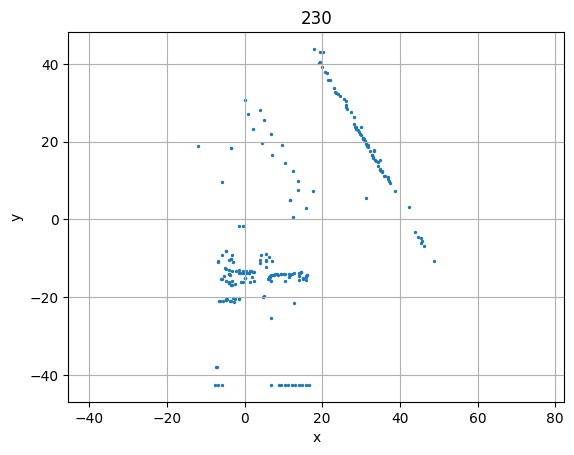

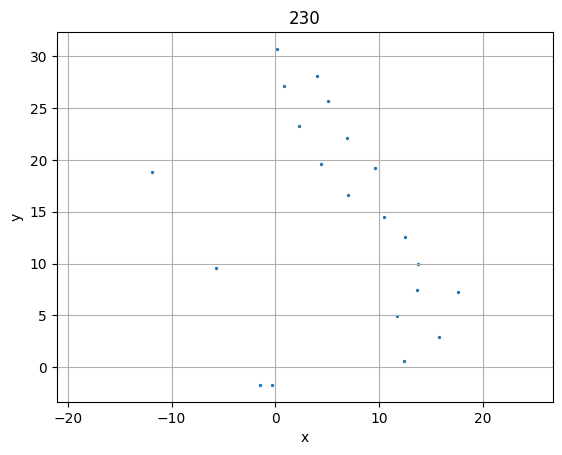

In [13]:
from sklearn.model_selection import train_test_split
from sklearn import svm

X = dfs2_copy[0].drop(columns=['label', 'x', 'y'])
Y = dfs2_copy[0]['label']
print(Y.head())

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.01, random_state=30)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, Y, test_size=0.01, random_state=30)

svc3 = svm.SVC(C=100, kernel='poly', gamma=1).fit(X_train, y_train)

print(svc3.score(X_train2, y_train2))
pred = svc3.predict(X_train2)

points = []
points2 = []
points3 = []
for i in range(len(pred)):
    if pred[i] == 1:
        x = dfs2_copy[0].iloc[i, 0]
        y = dfs2_copy[0].iloc[i, 1]
        points.append((x,y))
    x2 = dfs2_copy[0].iloc[i, 0]
    y2 = dfs2_copy[0].iloc[i,1]
    points2.append((x2,y2))
    if dfs2_copy[0].iloc[i,11] == 1:
        x3 = dfs2_copy[0].iloc[i, 0]
        y3 = dfs2_copy[0].iloc[i,1]
        points3.append((x3,y3))

print(len(dfs2_copy[0]))

display(points)
display(points2)
display(points3)

In [14]:
from scipy.spatial.distance import cdist
#print(dfs2[0].head()

dfs2_copy = dfs2.copy()

def find_dist(df):
    distances_df = pd.DataFrame()
    for i, row in df.iterrows():
        #print(row)
        #print('\n\n')
        distances = cdist(df[['x', 'y']], np.array(row[['x', 'y']]).reshape(1, -1))
        #print(distances[0])
        #print(len(distances))
        closest_indices = np.argsort(distances.flatten())[:20]
        closest_distances = distances.flatten()[closest_indices]
        
        #print(len(closest_distances))
        for j in range(20):
            distances_df.loc[i, f'dist{j+1}'] = closest_distances[j]
    return distances_df

for i in range(len(dfs2_copy)):
    dist = find_dist(dfs2_copy[i])
    dfs2_copy[i] = pd.concat([dfs2_copy[i], dist], axis=1)
    label_column = dfs2_copy[i].pop('label')
    dfs2_copy[i]['label'] = label_column

print(dfs2_copy[0].head())




     x     y  dist1     dist2     dist3     dist4     dist5     dist6  \
0  6.7 -25.3    0.0  5.664804  5.948109  7.049113  9.500526  9.552487   
1 -6.5 -21.0    0.0  0.223607  0.905539  1.711724  1.811077  1.843909   
2 -6.3 -21.1    0.0  0.223607  0.728011  1.529706  1.627882  1.676305   
3 -4.8 -20.8    0.0  0.100000  0.223607  0.424264  0.806226  1.140175   
4 -3.7 -21.1    0.0  0.200000  1.000000  1.044031  1.063015  1.104536   

      dist7     dist8  ...     dist12     dist13     dist14     dist15  \
0  9.604166  9.908078  ...  10.195097  10.212248  10.295630  10.423531   
1  2.061553  2.801785  ...   4.044750   5.035871   5.048762   5.161395   
2  1.897367  2.600000  ...   3.863936   4.850773   4.866210   5.131277   
3  1.334166  1.529706  ...   2.334524   3.324154   3.337664   4.205948   
4  1.118034  1.140175  ...   2.340940   2.600000   2.801785   4.304649   

      dist16     dist17     dist18     dist19     dist20  label  
0  10.511898  10.601887  10.667708  10.801852  10.

score of big model: 0.9033613445378151
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


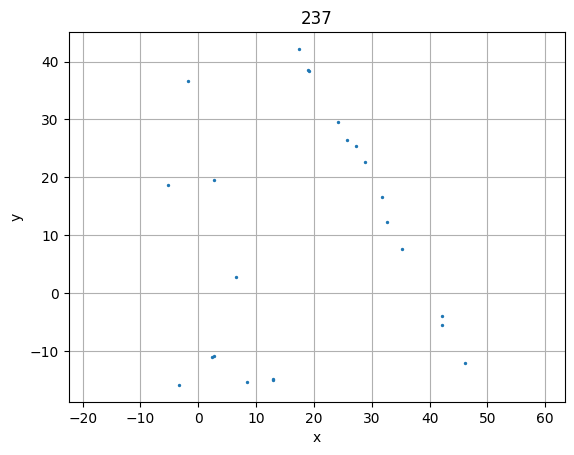

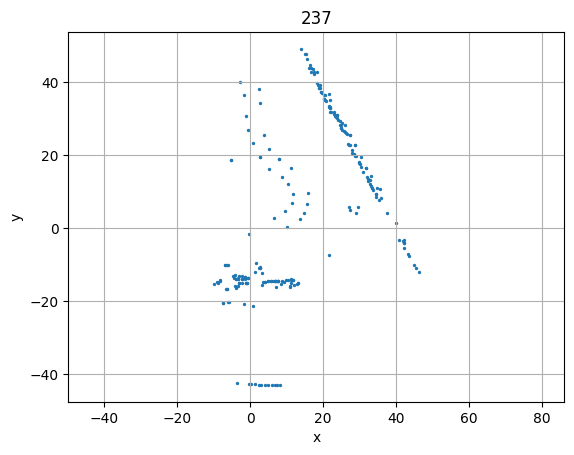

In [28]:
#feature eng
lar_df = pd.concat(dfs2_copy, ignore_index=True)
#print(lar_df.head())
lar_df['total_distances'] = lar_df[['dist1', 'dist2', 'dist3']].sum(axis=1)
lar_df['products'] = lar_df[['dist4', 'dist5', 'dist6']].prod(axis=1)

#lar_df = pd.concat(dfs2, ignore_index=True)
X3 = lar_df[['total_distances', 'products']]
Y3 = lar_df['label']


#gonna test on a single cloud
cloud_n = 1
dfs2_copy[cloud_n]['total_distances'] = dfs2_copy[cloud_n][['dist1', 'dist2', 'dist3']].sum(axis=1)
dfs2_copy[cloud_n]['products'] = dfs2_copy[cloud_n][['dist4', 'dist5', 'dist6']].prod(axis=1)

X2 = dfs2_copy[cloud_n][['total_distances', 'products']]
Y2 = dfs2_copy[cloud_n]['label']

from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, Y2, test_size= 0.01, random_state=15)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, Y3, test_size= 0.2, random_state=15)

from sklearn import svm
svc3 = svm.SVC().fit(X_train3, y_train3)



# score1 = svc.score(X_test, y_test)

# score2 = svc.score(X_train2, y_train2)

# print(score2)

# pred = svc.predict(X_train2)

# points = []
# points2 = []
# for i in range(len(pred)):        
#     if pred[i] == 1:
#         x = X.iloc[i, 0]
#         y = X.iloc[i, 1]
#         points.append((x,y))
#     x2 = X.iloc[i, 0]
#     y2 = X.iloc[i,1]
#     points2.append((x,y))

# display(points)
# display(points2)



score1 = svc3.score(X_test3, y_test3)

print('score of big model:', score1)

pred = svc3.predict(X_train2)

points = []
points2=[]
print(pred)
for i in range(len(pred)):
    if pred[i] == 1:
        x = dfs2_copy[cloud_n].iloc[i, 0]
        y = dfs2_copy[cloud_n].iloc[i, 1]
        
        points.append((x,y))
    x2 = dfs2_copy[cloud_n].iloc[i, 0]
    y2 = dfs2_copy[cloud_n].iloc[i,1]
    points2.append((x2,y2))

display(points)
display(points2)

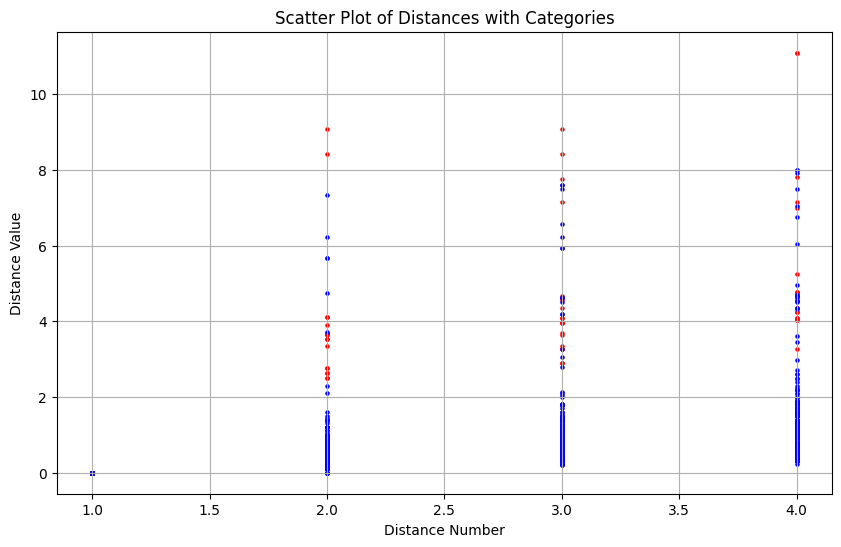

In [138]:



dff = dfs2_copy[0]

plt.figure(figsize=(10, 6))

for i in range(1, 5):
    
    plt.scatter([i] * len(dff[dff['label'] == 1]), dff[dff['label'] == 1][f'dist{i}'], color='red', label=f'Category 1, Distance {i}', s=5)

    plt.scatter([i] * len(dff[dff['label'] == 0]), dff[dff['label'] == 0][f'dist{i}'], color='blue', label=f'Category 0, Distance {i}', s=5)
 
 
plt.xlabel('Distance Number')
plt.ylabel('Distance Value')


plt.title('Scatter Plot of Distances with Categories')
plt.grid(True)
plt.show()

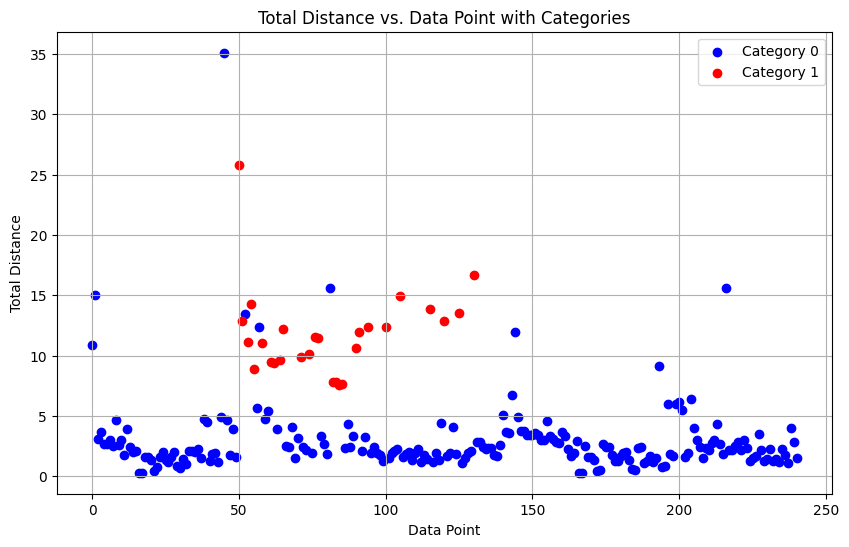

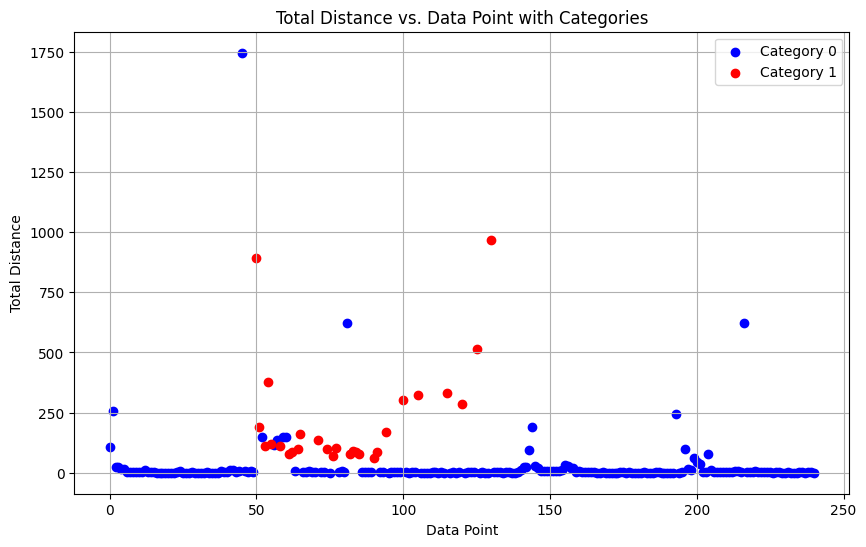

In [17]:

dff = dfs2_copy[1]


dff['total_distance'] = dff[['dist2', 'dist3', 'dist4']].sum(axis=1)
dff['total_distance2'] = dff[['dist4', 'dist5', 'dist6']].prod(axis=1)



plt.figure(figsize=(10, 6))


plt.scatter(dff[dff['label'] == 0].index, dff[dff['label'] == 0]['total_distance'], color='blue', label='Category 0')


plt.scatter(dff[dff['label'] == 1].index, dff[dff['label'] == 1]['total_distance'], color='red', label='Category 1')


plt.xlabel('Data Point')
plt.ylabel('Total Distance')
plt.legend()


plt.title('Total Distance vs. Data Point with Categories')
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))


plt.scatter(dff[dff['label'] == 0].index, dff[dff['label'] == 0]['total_distance2'], color='blue', label='Category 0')


plt.scatter(dff[dff['label'] == 1].index, dff[dff['label'] == 1]['total_distance2'], color='red', label='Category 1')


plt.xlabel('Data Point')
plt.ylabel('Total Distance')
plt.legend()

plt.title('Total Distance vs. Data Point with Categories')
plt.grid(True)
plt.show()

So the SVM simply performs shit, I am not sure why it cannot learn the representation to at least some degree as it is evident in the representations, maybe I will normalize the input but still i doubt it will help much but would help some as the patterns are decent even though the scale might be a bit different. Gonna try creating a graph convolutional network to better understand the geometrical representation/embedding.

In [18]:
from scipy.spatial.distance import cdist
#print(dfs2[0].head()

df_gnn_copy = dfs2.copy()

def find_dist(df):
    distances_df = pd.DataFrame()
    density_df = pd.DataFrame()
    for i, row in df.iterrows():
        #print(row)
        #print('\n\n')
        radius = 2.3
        distances = cdist(df[['x', 'y']], np.array(row[['x', 'y']]).reshape(1, -1))
        #print(distances[0])
        num_points_within_radius = np.sum(distances.flatten() <= radius)
        density_df.loc[i, 'density'] = num_points_within_radius
        #print(len(distances))
        closest_indices = np.argsort(distances.flatten())[:7]
        closest_distances = distances.flatten()[closest_indices]
        
        closest_indices = closest_indices[:7]
        #print(len(closest_distances))
        for j in range(6):
            distances_df.loc[i, f'dist{j+1}'] = closest_distances[j]
            distances_df.loc[i, f'index{j+1}'] = closest_indices[j] 
    return distances_df, density_df

for i in range(len(df_gnn_copy)):
    dist, dens = find_dist(df_gnn_copy[i])
    df_gnn_copy[i] = pd.concat([df_gnn_copy[i], dist], axis=1)
    df_gnn_copy[i] = pd.concat([df_gnn_copy[i], dens], axis=1)
    label_column = df_gnn_copy[i].pop('label')
    df_gnn_copy[i]['label'] = label_column

    df_gnn_copy[i]['prod'] = df_gnn_copy[i][['dist2', 'dist3', 'dist4']].prod(axis=1)


print(df_gnn_copy[0].head())




     x     y  dist1  index1     dist2  index2     dist3  index3     dist4  \
0  6.7 -25.3    0.0     0.0  5.664804    13.0  5.948109    14.0  7.049113   
1 -6.5 -21.0    0.0     1.0  0.223607     2.0  0.905539   148.0  1.711724   
2 -6.3 -21.1    0.0     2.0  0.223607     1.0  0.728011   148.0  1.529706   
3 -4.8 -20.8    0.0     3.0  0.100000   149.0  0.223607     8.0  0.424264   
4 -3.7 -21.1    0.0     4.0  0.200000     5.0  1.000000     9.0  1.044031   

   index4     dist5  index5     dist6  index6  density  label        prod  
0     7.0  9.500526    27.0  9.552487   150.0      1.0      0  237.518954  
1     3.0  1.811077   149.0  1.843909     8.0      7.0      0    0.346598  
2     3.0  1.627882   149.0  1.676305     8.0      7.0      0    0.249018  
3     9.0  0.806226   148.0  1.140175     4.0     11.0      0    0.009487  
4   149.0  1.063015    10.0  1.104536     6.0     10.0      0    0.208806  


     density  label
0        1.0      0
1        7.0      0
2        7.0      0
3       11.0      0
4       10.0      0
..       ...    ...
229      4.0      0
230      4.0      0
231      5.0      0
232      5.0      0
233      1.0      0

[234 rows x 2 columns]


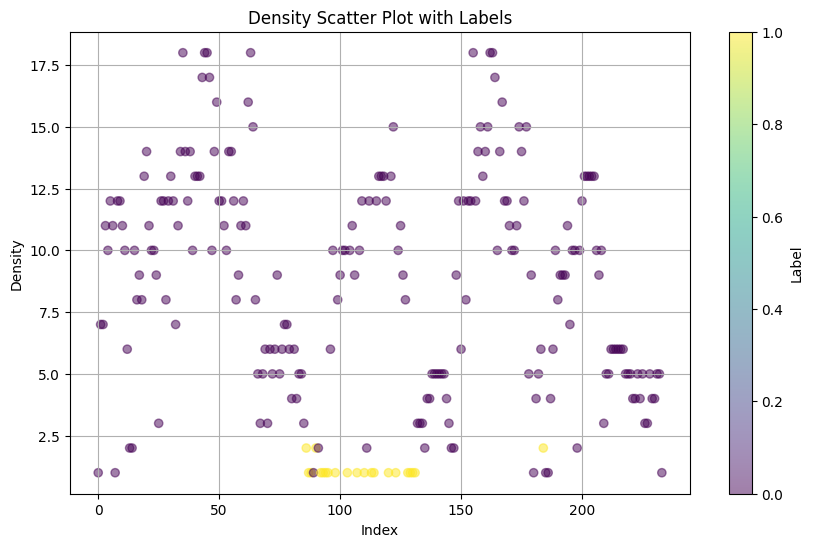

In [19]:
dist = df_gnn_copy[0][['density', 'label']]
print(dist)
plt.figure(figsize=(10, 6)) 
plt.scatter(dist.index, dist['density'], c=dist['label'], cmap='viridis', alpha=0.5)

plt.colorbar(label='Label')

plt.xlabel('Index')
plt.ylabel('Density')
plt.title('Density Scatter Plot with Labels')

plt.grid(True)
plt.show()

In [20]:
#print(dfs2_copy[0].head())
df_gnn = [] #dfs2_copy[0][['x', 'y', 'dist1', 'dist2', 'dist3', 'dist4', 'dist5', 'label']]
for i in range(len(df_gnn_copy)):
    df_gnn.append(df_gnn_copy[0][['x', 'y', 'dist2', 'dist3', 'dist4', 'dist5', 'dist6', 'index2', 'index3', 'index4', 'index5', 'index6', 'prod', 'density', 'label']])

print(df_gnn[0])


        x     y     dist2     dist3     dist4     dist5     dist6  index2  \
0     6.7 -25.3  5.664804  5.948109  7.049113  9.500526  9.552487    13.0   
1    -6.5 -21.0  0.223607  0.905539  1.711724  1.811077  1.843909     2.0   
2    -6.3 -21.1  0.223607  0.728011  1.529706  1.627882  1.676305     1.0   
3    -4.8 -20.8  0.100000  0.223607  0.424264  0.806226  1.140175   149.0   
4    -3.7 -21.1  0.200000  1.000000  1.044031  1.063015  1.104536     5.0   
..    ...   ...       ...       ...       ...       ...       ...     ...   
229  20.2  43.2  0.707107  1.044031  1.964688  2.500000  2.789265   228.0   
230  17.8  43.9  0.538516  1.456022  1.878829  2.500000  3.720215   231.0   
231  18.3  43.7  0.538516  0.921954  1.341641  1.964688  3.417601   230.0   
232  19.2  43.5  0.500000  0.921954  1.044031  1.456022  3.014963   228.0   
233  15.6  46.9  3.720215  4.186884  4.951767  5.445181  5.903389   230.0   

     index3  index4  index5  index6        prod  density  label  
0      14

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

def graphitize(df_list):
    graphs = []
    labels = []
    for i in range(len(df_list)):
        graph = df_list[i][['density', 'prod']]
        label = df_list[i][['label']].values
        graph_arr = graph.values
        arr_scaled = scaler.fit_transform(graph_arr)
        graphs.append(arr_scaled)
        labels.append(label)
        arr_scaled = scaler.fit_transform(graph_arr)
    return graphs, labels
    
graphs, labels = graphitize(df_gnn)

print(graphs[0])

[[-1.52795453  2.45198262]
 [-0.2540542  -0.21179989]
 [-0.2540542  -0.21289585]
 [ 0.59521269 -0.21558612]
 [ 0.38289597 -0.21334748]
 [ 0.80752942 -0.21377371]
 [ 0.59521269 -0.2076169 ]
 [-1.52795453  2.73089007]
 [ 0.80752942 -0.21558036]
 [ 0.80752942 -0.2153085 ]
 [ 0.59521269 -0.21037156]
 [ 0.38289597 -0.21107548]
 [-0.46637092 -0.21408843]
 [-1.31563781 -0.09299454]
 [-1.31563781 -0.113747  ]
 [ 0.38289597 -0.21543853]
 [-0.04173748 -0.21438673]
 [ 0.17057925 -0.20175202]
 [-0.04173748 -0.21368171]
 [ 1.01984614 -0.20449218]
 [ 1.23216286 -0.21452115]
 [ 0.59521269 -0.21013567]
 [ 0.38289597 -0.20448606]
 [ 0.38289597 -0.20879273]
 [ 0.17057925 -0.18616346]
 [-1.10332109 -0.1805238 ]
 [ 0.80752942 -0.2154497 ]
 [ 0.80752942 -0.21105422]
 [-0.04173748 -0.16126243]
 [ 0.80752942 -0.20203714]
 [ 1.01984614 -0.21372798]
 [ 0.80752942 -0.2112198 ]
 [-0.2540542  -0.21349768]
 [ 0.59521269 -0.19935738]
 [ 1.23216286 -0.21338763]
 [ 2.08142975 -0.21569267]
 [ 1.23216286 -0.19454149]
 

In [22]:
#creating the adjacency matrix
adjacency_mats = []
for i in range(len(df_gnn_copy)):
    size = 310 # len(df_gnn_copy[i]['label'])
    zero = np.zeros((size, size))
    adjacency_mats.append(zero)

#print(df_gnn[0])
for i in range(len(adjacency_mats)):
    for j in range(len(adjacency_mats[i])):
        dist = df_gnn[i].iloc[i,2:7].values
        indices = df_gnn[i].iloc[i,7:12].values
        
        for k in range(len(indices)):
            adjacency_mats[i][j][int(indices[k])] = dist[k]
            adjacency_mats[i][int(indices[k])][j] = dist[k]

#np.set_printoptions(threshold=np.inf)
#print(str(adjacency_mats[0][0]))

# label = df_gnn[0][['label']].array
print(labels[0].shape)

for i in range(len(labels)):
    diff = 310-labels[i].shape[0]
    #print(labels[i].shape)
    zeros = np.zeros((diff,1))
    labels[i] = np.vstack((labels[i], zeros))

print(labels[0][:-10])



(234, 1)
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 

In [23]:
print(graphs[0].shape)
print(adjacency_mats[0].shape)
data= []

for i in range(len(graphs)):
    graphs
    desired_shape = (adjacency_mats[i].shape[0], 2)
    num_rows_to_pad = desired_shape[0] - graphs[i].shape[0]
    graphs[i] = np.pad(graphs[i], ((0, num_rows_to_pad), (0, 0)), mode='constant')
    data.append(np.hstack((adjacency_mats[i], graphs[i])))

print(len(data))
print(graphs[0].shape)
print(adjacency_mats[0].shape)

X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.25, random_state=42)

x_feat_train = []
adjacency_matrix_train = []
for i in range(len(X_train)):
    x = X_train[i][:,-2:]
    adja = X_train[i][:,:-2]
    #print(lab.shape)
    x_feat_train.append(x)
    adjacency_matrix_train.append(adja)



x_feat_val = []
adjacency_matrix_val = []
for i in range(len(X_val)):
    x = X_val[i][:,-2:]
    adja = X_val[i][:,:-2]
    #print(lab.shape)
    x_feat_val.append(x)
    adjacency_matrix_val.append(adja)
    #print(X_train[i].shape)
print(len(x_feat_val))
print(len(adjacency_matrix_val))

x_feat_train = torch.tensor(x_feat_train, dtype=torch.float32)
adjacency_matrix_train = torch.tensor(adjacency_matrix_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
x_feat_val = torch.tensor(x_feat_val, dtype=torch.float32)
adjacency_matrix_val = torch.tensor(adjacency_matrix_val, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.float32)
#y_val = y_val.clone().detach().long() this is only relevant if we already defined the y_val tensor but first run we should not have it defined, it is stilla list, and in further runs we do get a userwarning but probably fine

print('\n\ndimensions:')
print(x_feat_train.shape)
print(adjacency_matrix_train.shape)
print(y_train.shape)

(234, 2)
(310, 310)
24
(310, 2)
(310, 310)
6
6


dimensions:
torch.Size([18, 310, 2])
torch.Size([18, 310, 310])
torch.Size([18, 310, 1])


/tmp/ipykernel_273317/2892699998.py:41: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:261.)
  x_feat_train = torch.tensor(x_feat_train, dtype=torch.float32)


In [24]:
import torch.nn.functional as F
import torch.nn.init as init


# x_feat_train = torch.tensor(x_feat_train, dtype=torch.float32)
# adjacency_matrix_train = torch.tensor(adjacency_matrix_train, dtype=torch.float32)
# y_train = torch.tensor(y_train, dtype=torch.long)
# x_feat_val = torch.tensor(x_feat_val, dtype=torch.float32)
# adjacency_matrix_val = torch.tensor(adjacency_matrix_val, dtype=torch.float32)
# y_val = torch.tensor(y_val, dtype=torch.long)
# #y_val = y_val.clone().detach().long() this is only relevant if we already defined the y_val tensor but first run we should not have it defined, it is stilla list, and in further runs we do get a userwarning but probably fine


class GraphDataset(Dataset):
    def __init__(self, adjacency_matrices, x, labels):
        self.adjacency_matrices = adjacency_matrices
        self.labels = labels
        self.x = x

    def __len__(self):
        return len(self.adjacency_matrices)

    def __getitem__(self, idx):
        return self.adjacency_matrices[idx],  self.x[idx], self.labels[idx]

train_dataset = GraphDataset(adjacency_matrix_train, x_feat_train, y_train)
val_dataset = GraphDataset(adjacency_matrix_val, x_feat_val, y_val)

batch_n = 3

train_loader = DataLoader(train_dataset, batch_size=batch_n, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_n, shuffle=True)




# class GraphConvolution(nn.Module):
#     def __init__(self, in_features, hidden_dim):
#         super(GraphConvolution, self).__init__()
#         self.linear = nn.Linear(in_features, hidden_dim)
#         self.hidden_dim = hidden_dim

#     def forward(self, x, adjacency):
#         """
#         x: Input features for each node (batch_size, num_nodes, in_features)
#         adjacency: Adjacency matrix of the graph (batch_size, num_nodes, num_nodes)
#         """
#         # Perform graph convolution
#         x = torch.matmul(adjacency, x)  # Aggregate neighboring features
#         x = self.linear(x)  # Apply linear transformation
#         return x

# class GraphConvolutionalNetwork(nn.Module):
#     def __init__(self, in_features, hidden_dim, num_classes):
#         super(GraphConvolutionalNetwork, self).__init__()
#         self.conv1 = GraphConvolution(in_features, hidden_dim)
#         self.conv2 = GraphConvolution(hidden_dim, hidden_dim)
#         self.linear = nn.Linear(hidden_dim, num_classes)
#         self.prelu = nn.PReLU()  # PReLU activation
#         self.batch_norm = nn.BatchNorm1d(num_classes)

#     def forward(self, x, adjacency):
#         """
#         x: Input features for each node (batch_size, num_nodes, in_features)
#         adjacency: Adjacency matrix of the graph (batch_size, num_nodes, num_nodes)
#         """
#         # Perform graph convolutions
#         x = self.prelu(self.conv1(x, adjacency))
#         #x = F.relu(self.conv2(x, adjacency))  # Apply the second graph convolution
#         x = self.linear(x)  # Apply the linear transformation
        
#         return x

class GraphConvolutionalNetwork(nn.Module):
    def __init__(self, in_features, hidden_dim, num_classes):
        super(GraphConvolutionalNetwork, self).__init__()
        self.conv1 = nn.Linear(in_features, hidden_dim)
        self.conv2 = nn.Linear(hidden_dim, hidden_dim)
        self.linear = nn.Linear(hidden_dim, num_classes)
        self.sig = nn.Sigmoid()  # PReLU activation
        #self.batch_norm1 = nn.BatchNorm1d(310)
        #self.batch_norm2 = nn.BatchNorm1d(310)
        #self.batch_norm3 = nn.BatchNorm1d(310)

    def forward(self, x, adjacency):
        """
        x: Input features for each node (batch_size, num_nodes, in_features)
        adjacency: Adjacency matrix of the graph (batch_size, num_nodes, num_nodes)
        """
        # Perform graph convolutions
        x = torch.matmul(adjacency, x)  # Aggregate neighboring features
        x = self.conv1(x)
        #x = self.batch_norm1(x)  # Apply BatchNorm to the output of conv1
        x = self.sig(x)

        x = torch.matmul(adjacency, x)  # Aggregate neighboring features
        x = self.conv2(x)
        #x = self.batch_norm2(x)  # Apply BatchNorm to the output of conv2
        x = self.sig(x)
        
        x = self.linear(x)  # Apply the linear transformation
        #x = self.batch_norm3(x)  # Apply BatchNorm to the output layer
        
        return x




#optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

criterion = nn.BCEWithLogitsLoss()

features = 2
hidden_dim = 256
num_classes = 1
epochs = 10

model = GraphConvolutionalNetwork(features, hidden_dim, num_classes)


# Manual parameter initialization
init.xavier_uniform_(model.conv1.weight)
init.xavier_uniform_(model.conv2.weight)
init.xavier_uniform_(model.linear.weight)

if model.conv1.bias is not None:
    init.constant_(model.conv1.bias, 0)
if model.conv2.bias is not None:
    init.constant_(model.conv2.bias, 0)
if model.linear.bias is not None:
    init.constant_(model.linear.bias, 0)

for epoch in range(epochs):
    model.train()

    running_loss = 0.0

    for batch_idx, (adjacency_matrix_batch, x_feat_batch, y_batch) in enumerate(train_loader):
        optimizer.zero_grad()

        #print(adjacency_matrix_batch.size(2), x_feat_batch.size(2), y_batch.size(2))

        outputs = model(x_feat_batch, adjacency_matrix_batch)
        #outputs = outputs.view(3, 310, 1)  # Shape: [batch_size, 310, 1]
        #print(outputs)
        #print(y_batch)
        loss = criterion(outputs, y_batch)
        #print(outputs-y_batch)
        #print(loss)

        # for name, param in model.named_parameters():
        #     print(name, param.grad)
        #     print('\nok\n')

        loss.backward()
        optimizer.step()
        # print('\n\n\n\nfuck')
    
        # for name, param in model.named_parameters():
        #     print(name, param.grad)
        #     print('\nlm\n')

        

        
        print(loss.item())
        running_loss += loss.item() * x_feat_batch.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)
    print(f'Epoch [{epoch + 1}/{epochs}], Loss: {epoch_loss:.4f}')





NameError: name 'nn' is not defined

In [137]:
class GraphDataset(Dataset):
    def __init__(self, adjacency_matrices, x, labels):
        self.adjacency_matrices = adjacency_matrices
        self.labels = labels
        self.x = x

    def __len__(self):
        return len(self.adjacency_matrices)

    def __getitem__(self, idx):
        return self.adjacency_matrices[idx],  self.x[idx], self.labels[idx]
    
print(x_feat_train[0])

train_dataset = GraphDataset(adjacency_matrix_train, x_feat_train, y_train)
val_dataset = GraphDataset(adjacency_matrix_val, x_feat_val, y_val)

batch_n = 3

train_loader = DataLoader(train_dataset, batch_size=batch_n, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_n, shuffle=True)

print(x_feat_train.shape)

tensor([[-1.5280,  2.4520],
        [-0.2541, -0.2118],
        [-0.2541, -0.2129],
        [ 0.5952, -0.2156],
        [ 0.3829, -0.2133],
        [ 0.8075, -0.2138],
        [ 0.5952, -0.2076],
        [-1.5280,  2.7309],
        [ 0.8075, -0.2156],
        [ 0.8075, -0.2153],
        [ 0.5952, -0.2104],
        [ 0.3829, -0.2111],
        [-0.4664, -0.2141],
        [-1.3156, -0.0930],
        [-1.3156, -0.1137],
        [ 0.3829, -0.2154],
        [-0.0417, -0.2144],
        [ 0.1706, -0.2018],
        [-0.0417, -0.2137],
        [ 1.0198, -0.2045],
        [ 1.2322, -0.2145],
        [ 0.5952, -0.2101],
        [ 0.3829, -0.2045],
        [ 0.3829, -0.2088],
        [ 0.1706, -0.1862],
        [-1.1033, -0.1805],
        [ 0.8075, -0.2154],
        [ 0.8075, -0.2111],
        [-0.0417, -0.1613],
        [ 0.8075, -0.2020],
        [ 1.0198, -0.2137],
        [ 0.8075, -0.2112],
        [-0.2541, -0.2135],
        [ 0.5952, -0.1994],
        [ 1.2322, -0.2134],
        [ 2.0814, -0

In [46]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torch.nn.init import xavier_uniform_, constant_

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class GraphConvolution(nn.Module):
    """Graph Convolution Layer using the defined formula"""
    def __init__(self, in_features, out_features):
        super(GraphConvolution, self).__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.weight = nn.Parameter(torch.FloatTensor(in_features, out_features))
        self.bias = nn.Parameter(torch.FloatTensor(out_features))
        self.reset_parameters()

    def reset_parameters(self):
        nn.init.kaiming_uniform_(self.weight)
        if self.bias is not None:
            nn.init.constant_(self.bias, 0)

    def forward(self, input, adjacency_matrix):
        support = torch.matmul(input, self.weight)
        output = torch.matmul(adjacency_matrix, support)
        if self.bias is not None:
            return output + self.bias
        else:
            return output

class GraphConvolutionalNetwork(nn.Module):
    def __init__(self, in_features, hidden_dim, num_classes, dropout_rate=0.5):
        super(GraphConvolutionalNetwork, self).__init__()
        self.conv1 = GraphConvolution(in_features, hidden_dim)
        self.conv2 = GraphConvolution(hidden_dim, hidden_dim)
        self.dropout = nn.Dropout(dropout_rate)
        self.linear = nn.Linear(hidden_dim, num_classes)
        self.sig = nn.Sigmoid()

    # def forward(self, x, adjacency):
    #     x = torch.matmul(adjacency, x)
    #     x = F.relu(self.conv1(x))
    #     x = self.dropout(x)
    #     x = torch.matmul(adjacency, x)
    #     x = F.relu(self.conv2(x))
    #     x = self.dropout(x)
    #     x = self.linear(x)
    #     return x
    def forward(self, x, adjacency):
        x = F.relu(self.conv1(x, adjacency))
        x = self.dropout(x)
        x = F.relu(self.conv2(x, adjacency))
        x = self.dropout(x)
        x = self.linear(x)
        return x 

features = 2
hidden_dim = 256
num_classes = 1
epochs = 10
dropout_rate = 0.5
model = GraphConvolutionalNetwork(features, hidden_dim, num_classes, dropout_rate)

def initialize_weights(m):
    if isinstance(m, nn.Linear):
        xavier_uniform_(m.weight)
        if m.bias is not None:
            constant_(m.bias, 0)

model.apply(initialize_weights)

optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.BCEWithLogitsLoss()
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=50, gamma=0.1)

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for data in train_loader:
        adjacency_matrix, x_feat, labels = data
        adjacency_matrix, x_feat, labels = adjacency_matrix.to(device), x_feat.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(x_feat, adjacency_matrix)
        loss = criterion(outputs, labels)
        loss.backward()
        
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=2.0)
        optimizer.step()
        running_loss += loss.item()
    
    scheduler.step()
    print(f'Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader)}')


Epoch 1/10, Loss: 2.101165696978569
Epoch 2/10, Loss: 0.7716221511363983
Epoch 3/10, Loss: 0.6357167462507883
Epoch 4/10, Loss: 0.4743730326493581
Epoch 5/10, Loss: 0.3610639174779256
Epoch 6/10, Loss: 0.33504265546798706
Epoch 7/10, Loss: 0.31641126175721485
Epoch 8/10, Loss: 0.310370996594429
Epoch 9/10, Loss: 0.2878217548131943
Epoch 10/10, Loss: 0.2984578162431717


In [135]:

model.eval()
from scipy.stats import mode

all_outputs = []
all_labels = []
all_inputs = []

with torch.no_grad():
    for adjacency_matrix, x_feat, labels in val_loader:
        
        adjacency_matrix = adjacency_matrix.to(device)
        x_feat = x_feat.to(device)
        labels = labels.to(device)
        
        outputs = model(x_feat, adjacency_matrix)
        
        
        lists = []
        for graph in x_feat:
            original_graph = scaler.inverse_transform(graph)
            lists.append(original_graph)
        all_inputs.append(lists)
        all_outputs.append(outputs.cpu().numpy())
        all_labels.append(labels.cpu().numpy())

print(f"Output shape: {all_outputs[0].shape}")
print(f"Labels shape: {all_labels[0].shape}")
print(f"Inputs shape: {len(all_inputs[0]), all_inputs[0][0].shape}")

min_value = all_outputs[0][0].min()
max_value = all_outputs[0][0].max()

print(f"Minimum value in the first batch of outputs: {min_value}")
print(f"Maximum value in the first batch of outputs: {max_value}")



def label_deviations_z_score(data):
    mode_value = mode(data)[0]  
    labels = (data != mode_value).astype(int)  
        return labels

for i in range(len(all_outputs)):
    for j in range(len(all_outputs[i])):
        all_outputs[i][j] = label_deviations_z_score(all_outputs[i][j])



print(np.hstack((all_outputs[0][1], all_labels[0][1])))

errors = (all_labels[0][1] == 1) & (all_outputs[0][1] != 1)
num_errors = np.sum(errors)
print(num_errors)

total_positive_labels = np.sum(all_labels[0][1] == 1)
print(total_positive_labels)

error_percentage = (num_errors / total_positive_labels) * 100
print('Misses where label is 1 but prediction is not 1:', num_errors.item())
print('Error percentage (only where labels are 1):', error_percentage, '%')


Output shape: (3, 310, 1)
Labels shape: (3, 310, 1)
Inputs shape: (3, (310, 2))
Minimum value in the first batch of outputs: -349.0477600097656
Maximum value in the first batch of outputs: -2.5264344215393066
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 0.]
 [0. 0.]
 [1. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 1.]

/tmp/ipykernel_273317/1902075052.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_value = mode(data)[0]  # Get the mode value(s) of the data


In [79]:
positive_points = []

with torch.no_grad():
    for adjacency_matrix, x_feat, labels in val_loader:
        
        adjacency_matrix = adjacency_matrix.to(device)
        x_feat = x_feat.to(device)
        labels = labels.to(device)
        
        outputs = model(x_feat, adjacency_matrix)
        
        
        binary_outputs = (outputs > 0).int()
        
        
        all_outputs.append(binary_outputs.cpu().numpy())
        all_labels.append(labels.cpu().numpy())
        
        
        positive_points_batch = x_feat[binary_outputs.squeeze() == 1].cpu().numpy()
        positive_points.append(positive_points_batch)


print(f"Output shape: {all_outputs[0].shape}")
print(f"Labels shape: {all_labels[0].shape}")


min_value = all_outputs[0].min()
max_value = all_outputs[0].max()

print(f"Minimum value in the first batch of outputs: {min_value}")
print(f"Maximum value in the first batch of outputs: {max_value}")

for i in range(len(outputs)):
    outputs[i] = (outputs[i] < -4).int()


num_errors = torch.sum(outputs[0] != labels[0])
print('misses:', num_errors, 'error percentage:', num_errors/len(outputs[0]))




Output shape: (3, 310, 1)
Labels shape: (3, 310, 1)
Minimum value in the first batch of outputs: -11728.619140625
Maximum value in the first batch of outputs: -2.408615827560425
misses: tensor(26) error percentage: tensor(0.0839)


In [44]:
sample_data = dataset[0]
print("Adjacency Matrix:", sample_data[0])
print("Features:", sample_data[1])
print("Labels:", sample_data[2]) 


Adjacency Matrix: tensor([  6.7000, -25.3000,  -6.5000, -21.0000,  -6.3000, -21.1000,  -4.8000,
        -20.8000,  -3.7000, -21.1000,  -3.5000, -21.1000,  -2.6000, -21.2000,
         12.7000, -21.6000,  -4.7000, -20.6000,  -4.5000, -20.5000,  -3.0000,
        -20.3000,  -2.5000, -20.4000,  -1.5000, -20.3000,   4.7000, -20.0000,
          5.0000, -19.6000,  -3.9000, -16.4000,  -3.3000, -16.8000,  -2.4000,
        -16.6000,  -5.9000, -15.4000,  -4.8000, -15.8000,  -3.9000, -16.0000,
         -3.3000, -15.8000,  -0.9000, -16.1000,  -0.5000, -16.0000,   1.3000,
        -16.1000,   2.5000, -15.9000,   6.0000, -15.4000,   6.8000, -15.8000,
         10.4000, -15.8000,  14.0000, -15.5000,  15.1000, -15.3000,  15.7000,
        -15.5000,  -6.0000, -15.3000,  -5.3000, -14.5000,  -3.8000, -14.4000,
          0.2000, -15.0000,   2.0000, -14.9000,   6.2000, -15.1000,   6.5000,
        -14.7000,  11.5000, -14.8000,  15.1000, -15.0000,  15.8000, -14.7000,
         -4.0000, -14.1000,  -1.1000, -13.9000

IndexError: tuple index out of range